# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

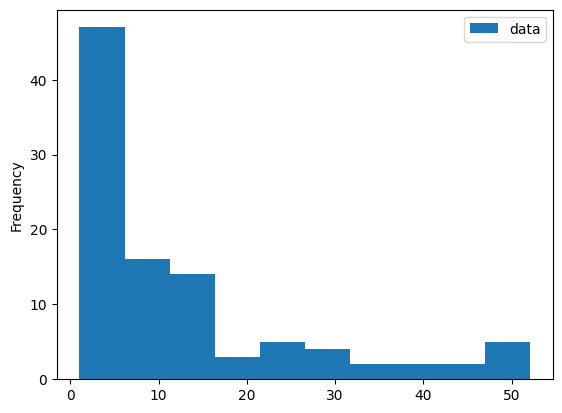

In [48]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

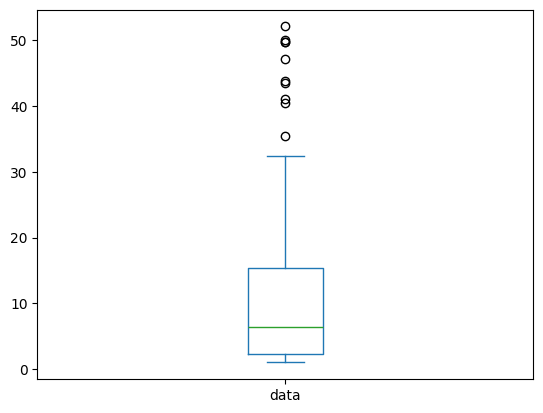

In [49]:
df.plot.box()

**My Answer**

Looking at these two visualizations of drug price data, each offers distinct advantages and disadvantages for the administrator's needs. The boxplot excels at clearly showing key summary statistics with the median around $6-7, quartiles, and range, while making the expensive drugs ($40-50+) immediately visible as distinct outlier points above the whiskers. This compact representation efficiently answers the administrator's question about expensive drug pricing context and makes the skewed distribution pattern obvious. However, it doesn't show the actual frequency distribution or density of values and provides limited detail about the shape of the data distribution.

The histogram, by contrast, shows the complete distribution shape and reveals that most drugs are very inexpensive with heavy concentration near $0-5, while displaying the frequency of values at different price points for better understanding of overall data structure. Unfortunately, the outliers are less prominent in this format, appearing as small bars that might be overlooked, and it's harder to quickly identify specific percentiles or summary statistics. The current binning also makes it difficult to see fine detail in the low-price range where most data concentrates.

For the administrator's specific question about expensive drugs in context, I'd choose the boxplot since it directly highlights the outliers while showing their relationship to the typical price range. To improve the formatting, I'd add a title like "Drug Price Distribution with Outliers Highlighted," include actual price values on the y-axis labels, and annotate the expensive outlier points with their actual values. For the histogram alternative, I'd use more granular bins in the 0-20 range and add a note about outliers, or consider a log scale to better show the full range.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

**Hi grader!** 👋  
I know this section might look a little squished, but I formatted the plots to show 6 per row to save space and make scrolling easier for you. Hope it helps and thanks for reviewing! 😊


**CKD ANALYSIS**


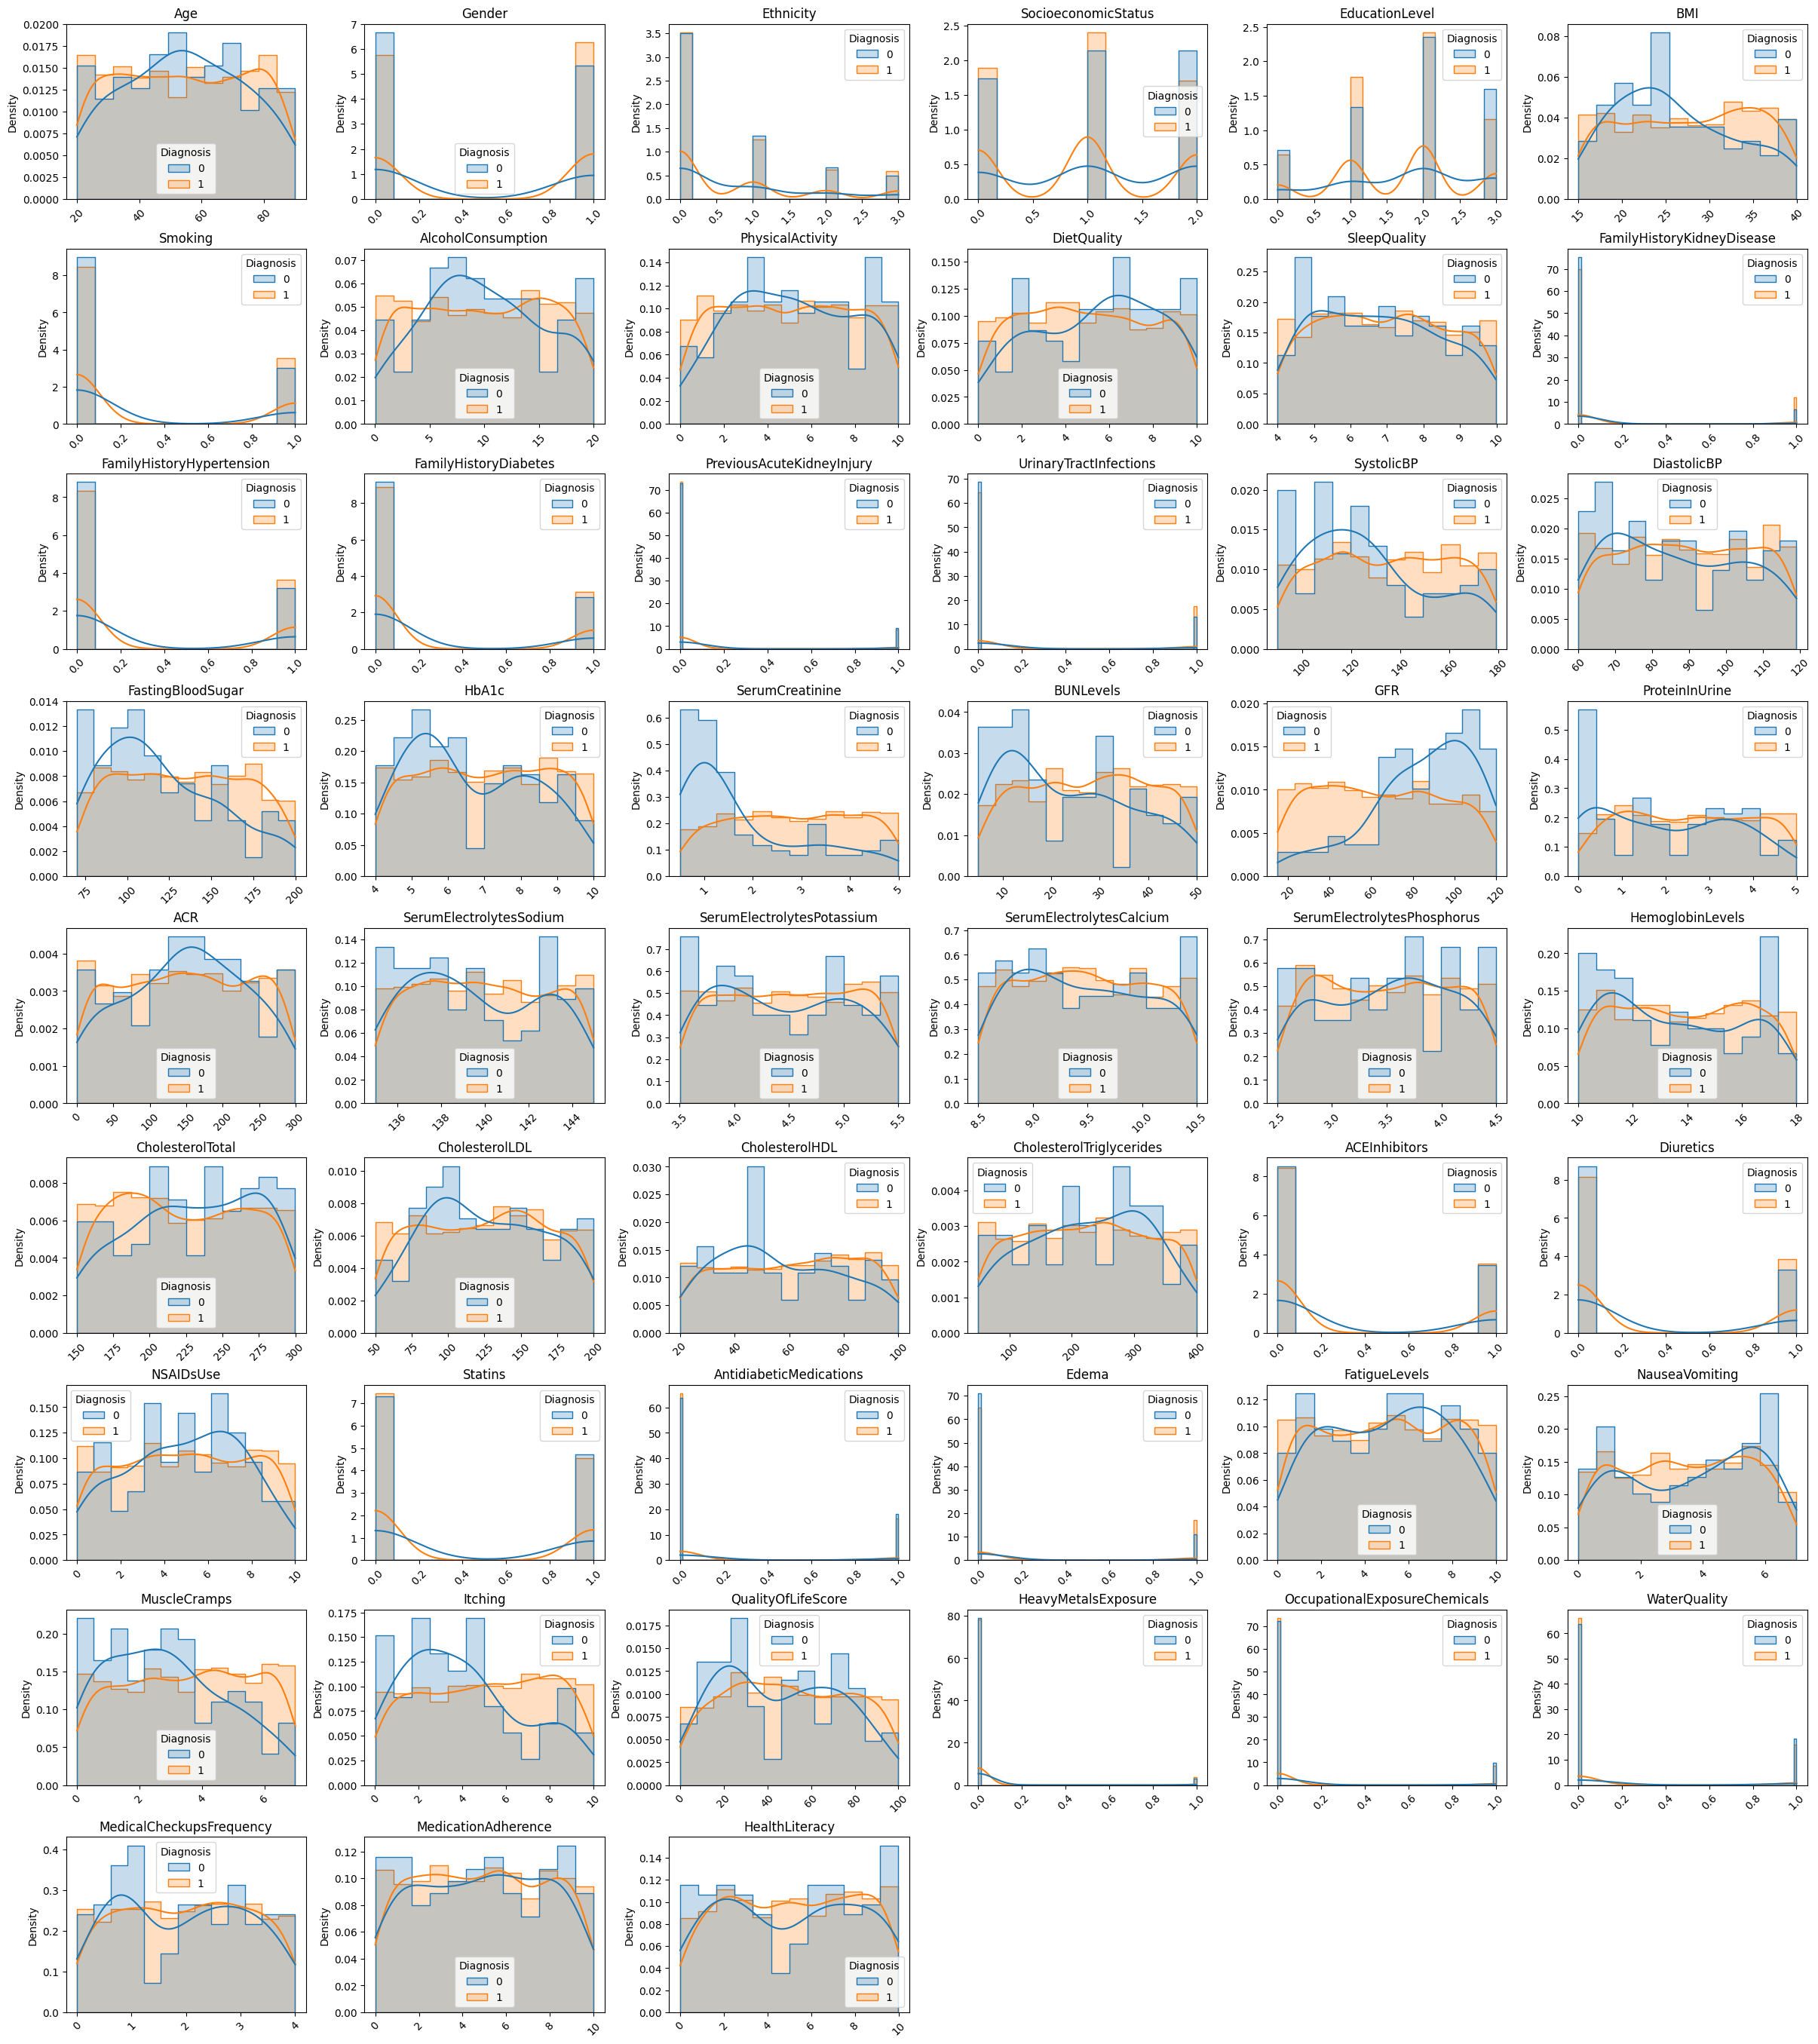

In [50]:
# 1) Load the data
ckd = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# 2) Select numeric cols (drop ID + target)
numeric_cols = [
    c for c in ckd.select_dtypes(include="number").columns
    if c not in ("PatientID", "Diagnosis")
]
# 3) Grid layout
plots_per_row = 6
total = len(numeric_cols)
rows  = (total + plots_per_row - 1) // plots_per_row  
fig, axes = plt.subplots(
    rows, plots_per_row,
    figsize=(plots_per_row * 4, rows * 3),
    constrained_layout=True
)
axes = axes.flatten()

# 4) Plot histograms with KDE and hue="Diagnosis" to compare CKD vs non-CKD
for i, col in enumerate(numeric_cols):
    sns.histplot(
        data=ckd,
        x=col,
        hue="Diagnosis",               # ← Adds grouping
        element="step",                # ← Draws as outlines
        stat="density",               
        common_norm=False,             # ← Keeps each group independent
        kde=True,
        kde_kws={"cut": 0},
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Density")
    axes[i].tick_params(axis='x', rotation=45)  

# 5) Remove any empty subplots
for ax in axes[total:]:
    fig.delaxes(ax)

plt.show()


## Distribution Insights by CKD Diagnosis

I plotted all numeric features and grouped them by CKD diagnosis (0 = no CKD, 1 = CKD). Here's what stands out from the visual breakdown.

### Notable Differences

- **GFR** and **SerumCreatinine** are the clearest separators :CKD patients show lower GFR and higher creatinine, exactly what we’d expect.
- **BUNLevels** and **ProteinInUrine** are also clearly higher in CKD, reinforcing these as key diagnostic indicators.
- **FatigueLevels**, **Itching**, **MuscleCramps**, and **QualityOfLifeScore** show big differences. CKD patients report worse scores across the board, which connects the disease to daily physical discomfort and lower well-being.
- **HbA1c** and **FastingBloodSugar** are both higher in CKD patients, which suggests a strong overlap with diabetes.

### Behavioral and Lifestyle Trends

- CKD patients tend to have **slightly lower PhysicalActivity** and **worse DietQuality**.
- **MedicationAdherence** and **HealthLiteracy** don’t differ much, but some CKD patients still score low, that could matter in treatment planning.
- **NSAIDsUse** is surprisingly high in both groups. Since NSAIDs can worsen kidney function, this might be a risk factor worth flagging.

### Flat or Low-Variance Features

- **WaterQuality**, **HeavyMetalsExposure**, and **OccupationalExposureChemicals** are mostly zero which will not likely to add much value to analysis or modeling.
- Some medical history features (like **FamilyHistoryDiabetes**) are heavily one-sided but still useful.

### Overall Takeaway

The CKD group consistently shows poorer clinical markers and worse symptom and quality-of-life scores. 

Now I’m curious : how do individual symptoms like **fatigue**, **itching**, and **muscle cramps** actually vary between CKD and non-CKD patients? The histograms gave us a general shape, but I want to see the **distribution more clearly** across individuals.

Let’s take a closer look using **violin plots**, which can show both the spread and the density of scores for each group. 


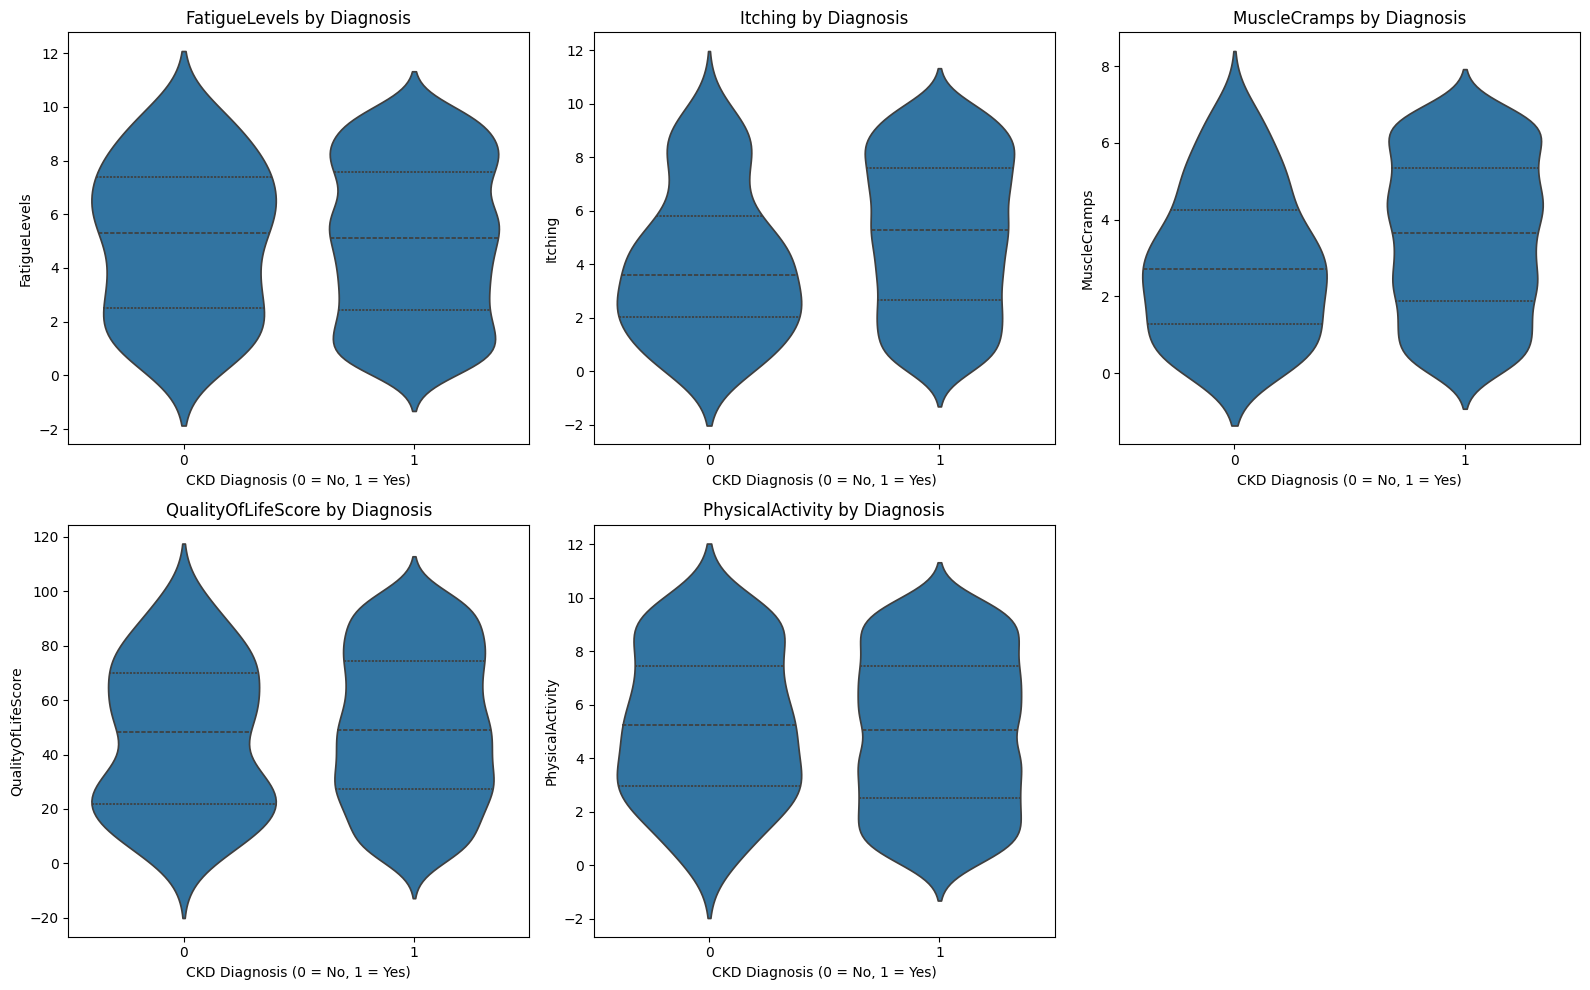

In [51]:
symptom_vars = [
    "FatigueLevels",
    "Itching",
    "MuscleCramps",
    "QualityOfLifeScore",
    "PhysicalActivity"
]

plt.figure(figsize=(16, 10))

for i, col in enumerate(symptom_vars, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=ckd, x="Diagnosis", y=col, inner="quartile")
    plt.title(f"{col} by Diagnosis")
    plt.xlabel("CKD Diagnosis (0 = No, 1 = Yes)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


## Symptom and Lifestyle Differences: Violin Plot Breakdown

To go beyond clinical markers, I focused on how CKD affects symptoms and daily life. Using violin plots, I compared distributions of fatigue, itching, muscle cramps, physical activity, and quality of life between CKD and non-CKD patients.

### What Stands Out

- **FatigueLevels** are consistently higher in CKD patients, with a much denser distribution around 7–9, compared to non-CKD patients who cluster more around 3–5.
- **Itching** and **MuscleCramps** also show a clear shift. CKD patients report more frequent and severe symptoms, suggesting chronic discomfort beyond what clinical measures capture.
- **QualityOfLifeScore** drops sharply in the CKD group. While non-CKD patients are more spread across the full range (including high scores), CKD patients tend to cluster in the lower half.
- **PhysicalActivity** appears slightly reduced among CKD patients, with a narrower distribution and lower median. This aligns with expected energy limitations from chronic illness.

### Now Let’s Switch Gears

I want to focus on categorical variables next. Let’s switch gears and draw bar plots so we can see the total counts of each category in those columns at a glance.


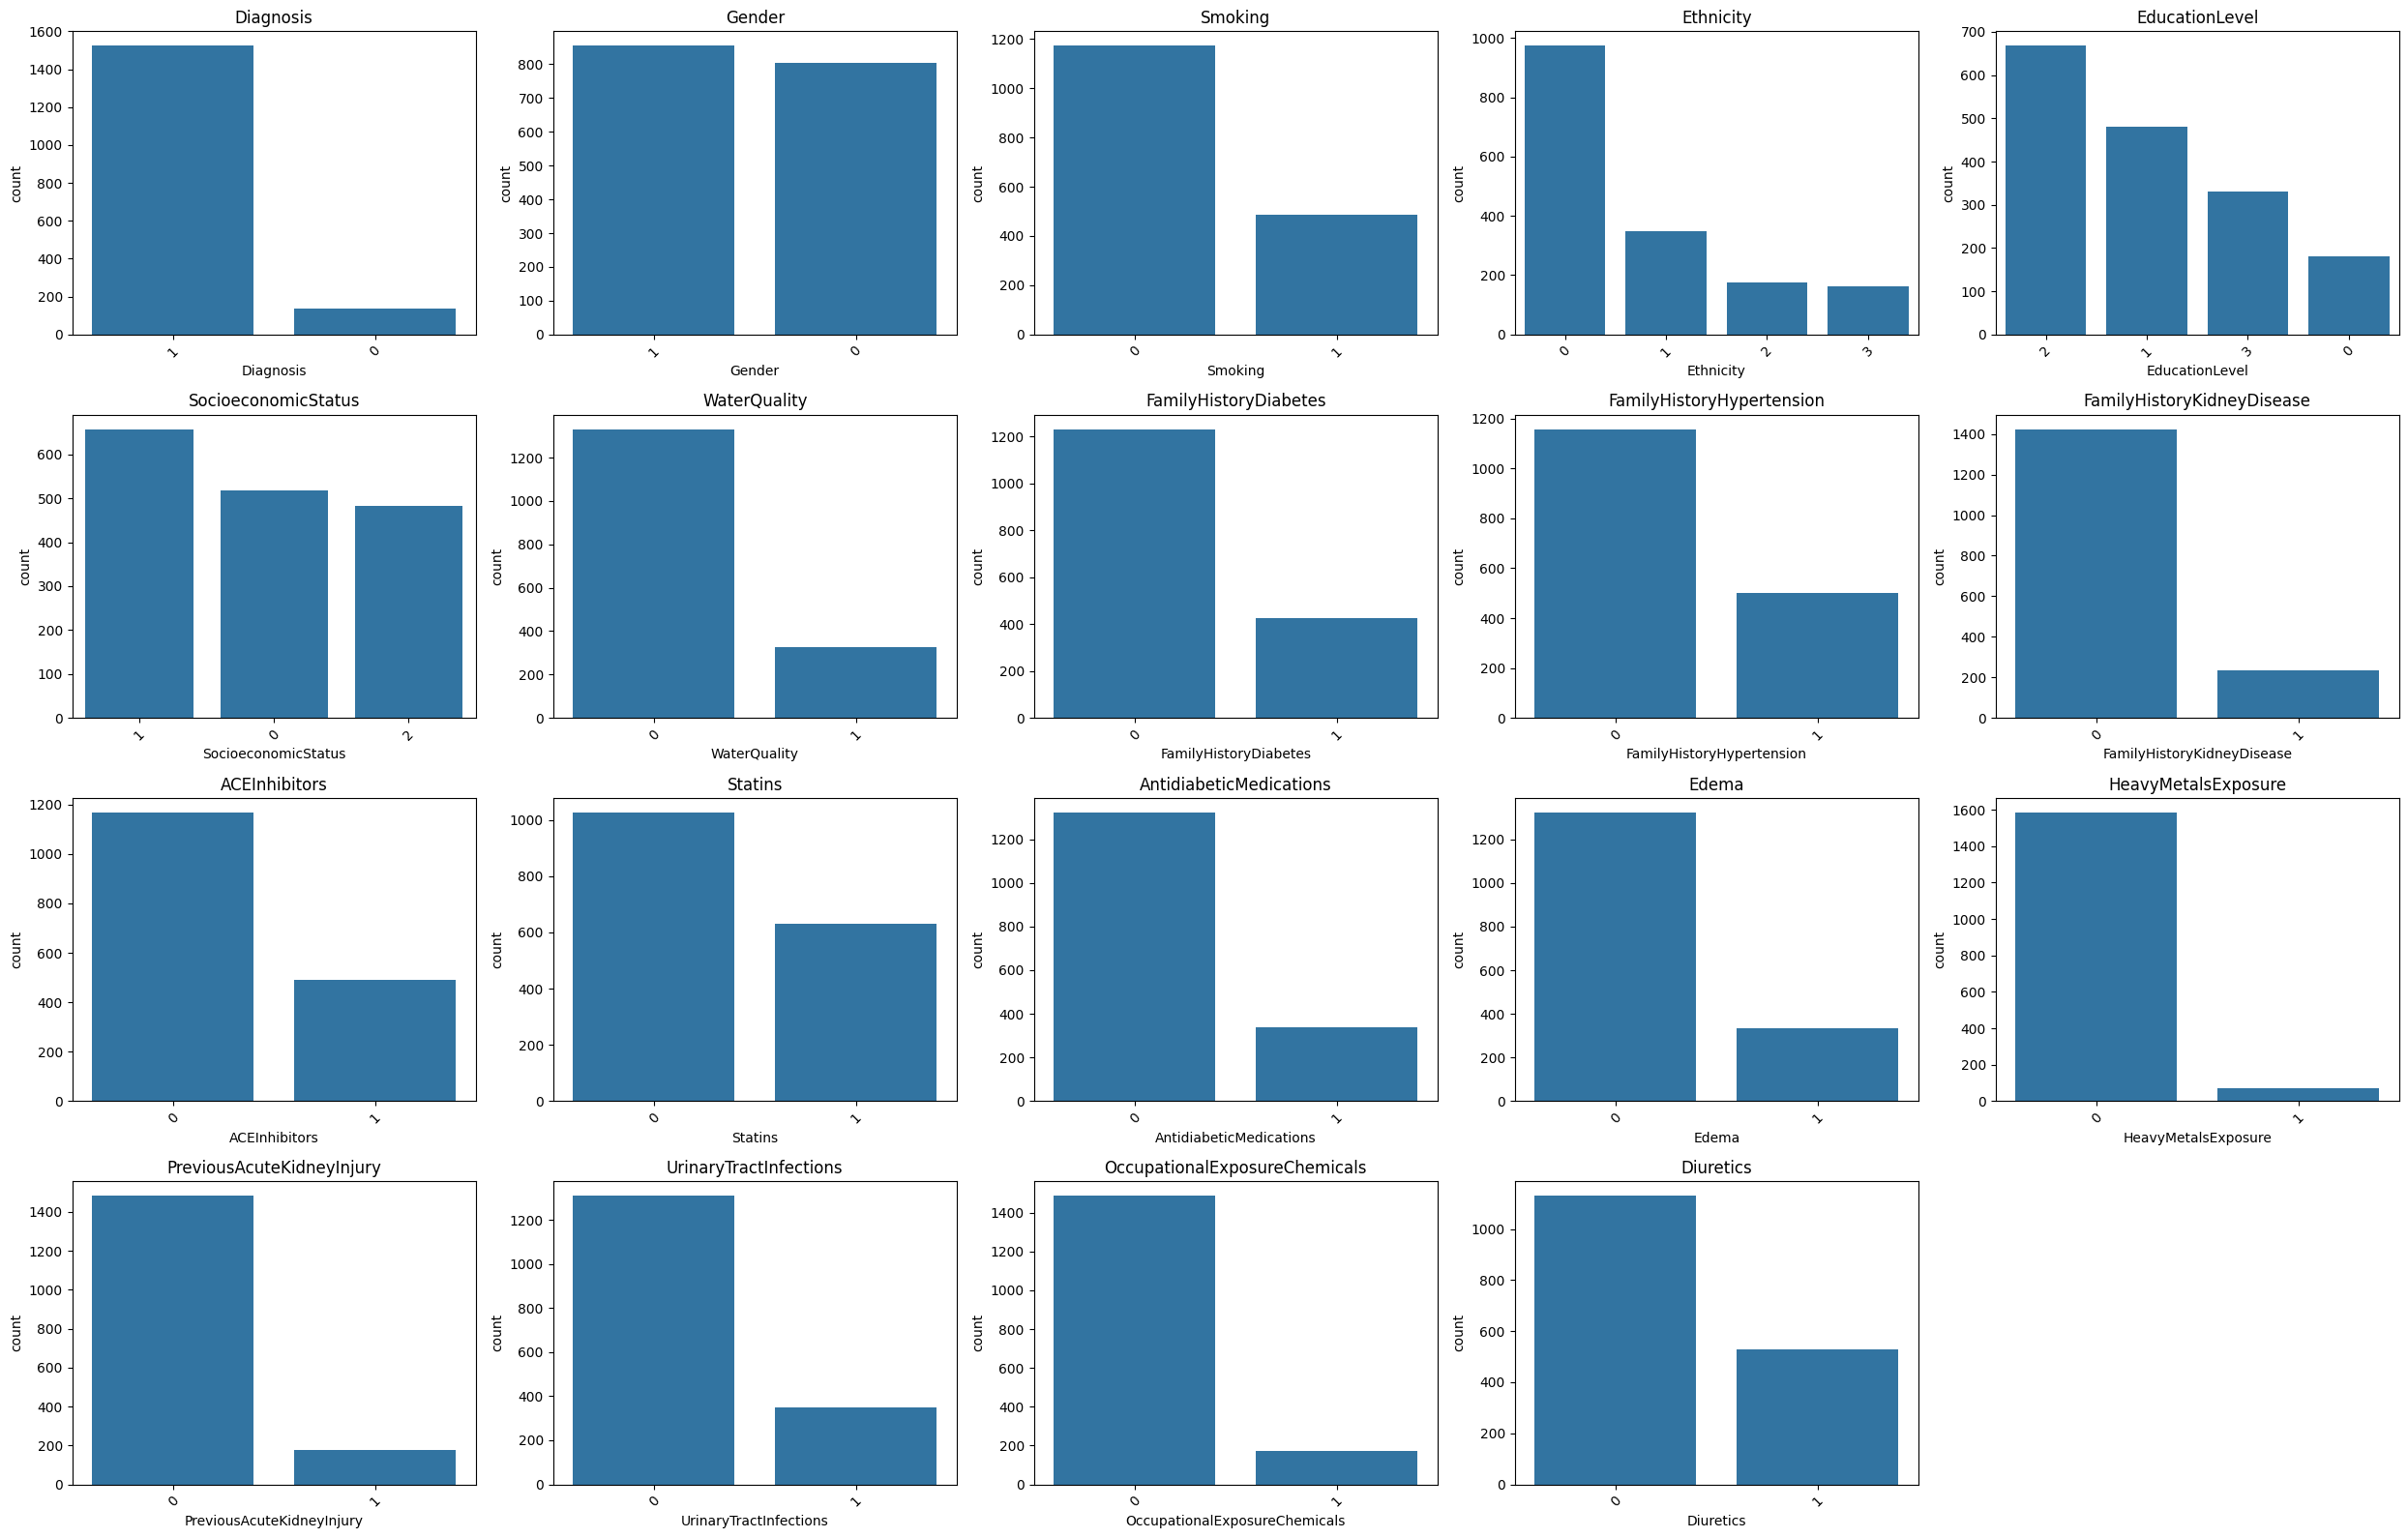

In [52]:
# Columns with low cardinality suitable for categorical plots (2 to 4 unique values)
valid_cat_cols = [
    'Diagnosis', 'Gender', 'Smoking', 'Ethnicity', 'EducationLevel', 'SocioeconomicStatus',
    'WaterQuality', 'FamilyHistoryDiabetes', 'FamilyHistoryHypertension', 'FamilyHistoryKidneyDisease',
    'ACEInhibitors', 'Statins', 'AntidiabeticMedications', 'Edema', 'HeavyMetalsExposure',
    'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'OccupationalExposureChemicals', 'Diuretics'
]

# Plot config
plots_per_row = 5
rows = -(-len(valid_cat_cols) // plots_per_row)  # Ceiling division

fig, axes = plt.subplots(rows, plots_per_row, figsize=(plots_per_row * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(valid_cat_cols):
    sns.countplot(data=ckd, x=col, ax=axes[i], order=ckd[col].value_counts().index)
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()





## Categorical Breakdown: Who's in the Dataset?

To understand who we’re working with, I looked at bar plots for all categorical variables with low cardinality. This gives a quick view of how many patients fall into each group.

### What’s Clear at a Glance

- **Most patients have CKD** (Diagnosis = 1), so the dataset is highly imbalanced. This will definitely matter for modeling.
- **Gender** is evenly split( thank God, because medical studies tend to forget women exist). It's refreshing to see balanced representation here.
- **Smoking** is skewed : the majority of patients are non-smokers.
- **Ethnicity** is overwhelmingly coded as 0 (likely Caucasian), with much smaller representation in other groups. This could hurt how generalizable the findings are, especially across more diverse populations. I’ll need to look into this more closely.

### Medical History & Medications

- **Family history** of diabetes, hypertension, and kidney disease is common  which can potentially reflect inherited or shared lifestyle risk factors.
- **Most patients are on medications** like ACE inhibitors, statins, and antidiabetic drugs, which makes sense given the CKD diagnosis.
- **Complications** like edema, UTIs, and past acute kidney injury show up a lot which are all consistent with the disease profile.

### Environmental Factors

- **HeavyMetalsExposure**, **OccupationalExposureChemicals**, and **WaterQuality** are almost entirely zeros. These won’t add much value unless there’s a hidden subgroup affected by exposure.

This gave me a much better sense of who’s in the dataset before jumping into more detailed analysis. It also helped flag a few things I’ll need to adjust for or be cautious about when interpreting results.

Next, I will calculate the **mean**, **median**, and **mode** for all numeric columns to get a sense of the typical values across the dataset.


In [53]:
# Means, Medians, and Modes for numeric columns
means = ckd[numeric_cols].mean()
medians = ckd[numeric_cols].median()
modes = ckd[numeric_cols].mode().iloc[0]

summary_stats = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

print("=== Central Tendencies ===")
display(summary_stats)

skewness = ckd[numeric_cols].skew()
print("Skewness:\n", skewness.round(2))


=== Central Tendencies ===


Mean      Median        Mode
Age                             54.441230   54.000000   81.000000
Gender                           0.515371    1.000000    1.000000
Ethnicity                        0.713080    0.000000    0.000000
SocioeconomicStatus              0.977697    1.000000    1.000000
EducationLevel                   1.693189    2.000000    2.000000
BMI                             27.620049   27.652077   15.033888
Smoking                          0.292948    0.000000    0.000000
AlcoholConsumption               9.969831    9.951503    0.021740
PhysicalActivity                 5.024247    5.072395    0.001186
DietQuality                      5.028544    4.989810    0.002407
SleepQuality                     6.942324    6.933255    4.001053
FamilyHistoryKidneyDisease       0.141049    0.000000    0.000000
FamilyHistoryHypertension        0.301386    0.000000    0.000000
FamilyHistoryDiabetes            0.257384    0.000000    0.000000
PreviousAcuteKidneyInjury        0.105485    0.000000    0.000000
UrinaryTractInfections           0.210368    0.000000    0.000000
SystolicBP                     134.392405  134.000000  116.000000
DiastolicBP                     89.313442   89.000000   89.000000
FastingBloodSugar              132.529429  131.478423   70.044768
HbA1c                            6.983682    6.988001    4.000405
SerumCreatinine                  2.753198    2.732006    0.501799
BUNLevels                       27.578147   28.077796    5.000249
GFR                             66.829202   66.555207   15.107850
ProteinInUrine                   2.493736    2.505260    0.000900
ACR                            149.881615  150.195312    0.178427
SerumElectrolytesSodium        139.968984  139.863171  135.006489
SerumElectrolytesPotassium       4.505336    4.505416    3.503408
SerumElectrolytesCalcium         9.489156    9.470789    8.500033
SerumElectrolytesPhosphorus      3.505543    3.511712    2.503727
HemoglobinLevels                13.927304   13.909388   10.004223
CholesterolTotal               224.251158  223.202106  150.015707
CholesterolLDL                 125.044597  126.537520   50.074597
CholesterolHDL                  60.746861   61.845056   20.030993
CholesterolTriglycerides       224.804603  226.466365   50.267668
ACEInhibitors                    0.295359    0.000000    0.000000
Diuretics                        0.318264    0.000000    0.000000
NSAIDsUse                        5.011715    5.078511    0.000469
Statins                          0.380952    0.000000    0.000000
AntidiabeticMedications          0.202532    0.000000    0.000000
Edema                            0.201929    0.000000    0.000000
FatigueLevels                    5.016697    5.117247    0.015194
NauseaVomiting                   3.482121    3.519894    0.005171
MuscleCramps                     3.525510    3.572522    0.006327
Itching                          5.054869    5.087086    0.013697
QualityOfLifeScore              49.730659   48.970075    0.087256
HeavyMetalsExposure              0.044002    0.000000    0.000000
OccupationalExposureChemicals    0.103074    0.000000    0.000000
WaterQuality                     0.197107    0.000000    0.000000
MedicalCheckupsFrequency         2.000336    2.040635    0.001082
MedicationAdherence              4.947788    4.974069    0.005392
HealthLiteracy                   5.144973    5.182949    0.004436

Skewness:
 Age                              0.00
Gender                          -0.06
Ethnicity                        1.18
SocioeconomicStatus              0.04
EducationLevel                  -0.22
BMI                             -0.04
Smoking                          0.91
AlcoholConsumption              -0.01
PhysicalActivity                 0.01
DietQuality                      0.02
SleepQuality                     0.05
FamilyHistoryKidneyDisease       2.06
FamilyHistoryHypertension        0.87
FamilyHistoryDiabetes            1.11
PreviousAcuteKidneyInjury        2.57
UrinaryTractInfections           1.42
SystolicBP                       0.03
DiastolicBP                      0.01
FastingBloodSugar                0.08
HbA1c                            0.01
SerumCreatinine                  0.01
BUNLevels                       -0.01
GFR                              0.02
ProteinInUrine                   0.02
ACR                             -0.02
SerumElectrolytesSodium          0.04
S


## Central Tendencies and Skewness

To get a clearer statistical picture of the data, I calculated the **mean**, **median**, and **mode** for every numeric column, alongside **skewness** to understand how symmetric or distorted each distribution is.

### Key Insights

- Most features have **very low skew**, which confirms the fairly symmetrical shapes we saw in many of the histograms.
- A few variables show **strong positive skew**, like:
  - **FamilyHistoryKidneyDisease** (2.06)
  - **PreviousAcuteKidneyInjury** (2.57)
  - **OccupationalExposureChemicals** (2.61)
  - **HeavyMetalsExposure** (4.45)
  
  
  
- **Smoking** (0.91), **AntidiabeticMedications** (1.48), and **Edema** (1.49) also show moderate skew, which could impact model assumptions.
- For **continuous variables**, most medians and means are very close — e.g., **BMI**, **Blood Pressure**, and **SleepQuality** — confirming relatively balanced distributions.

Next lets look for outliers.

Age: 0 outliers
BMI: 0 outliers
AlcoholConsumption: 0 outliers
PhysicalActivity: 0 outliers
DietQuality: 0 outliers
SleepQuality: 0 outliers
SystolicBP: 0 outliers
DiastolicBP: 0 outliers
FastingBloodSugar: 0 outliers
HbA1c: 0 outliers
SerumCreatinine: 0 outliers
BUNLevels: 0 outliers
GFR: 0 outliers
ProteinInUrine: 0 outliers
ACR: 0 outliers
SerumElectrolytesSodium: 0 outliers
SerumElectrolytesPotassium: 0 outliers
SerumElectrolytesCalcium: 0 outliers
SerumElectrolytesPhosphorus: 0 outliers
HemoglobinLevels: 0 outliers
CholesterolTotal: 0 outliers
CholesterolLDL: 0 outliers
CholesterolHDL: 0 outliers
CholesterolTriglycerides: 0 outliers
NSAIDsUse: 0 outliers
FatigueLevels: 0 outliers
NauseaVomiting: 0 outliers
MuscleCramps: 0 outliers
Itching: 0 outliers
QualityOfLifeScore: 0 outliers
MedicalCheckupsFrequency: 0 outliers
MedicationAdherence: 0 outliers
HealthLiteracy: 0 outliers


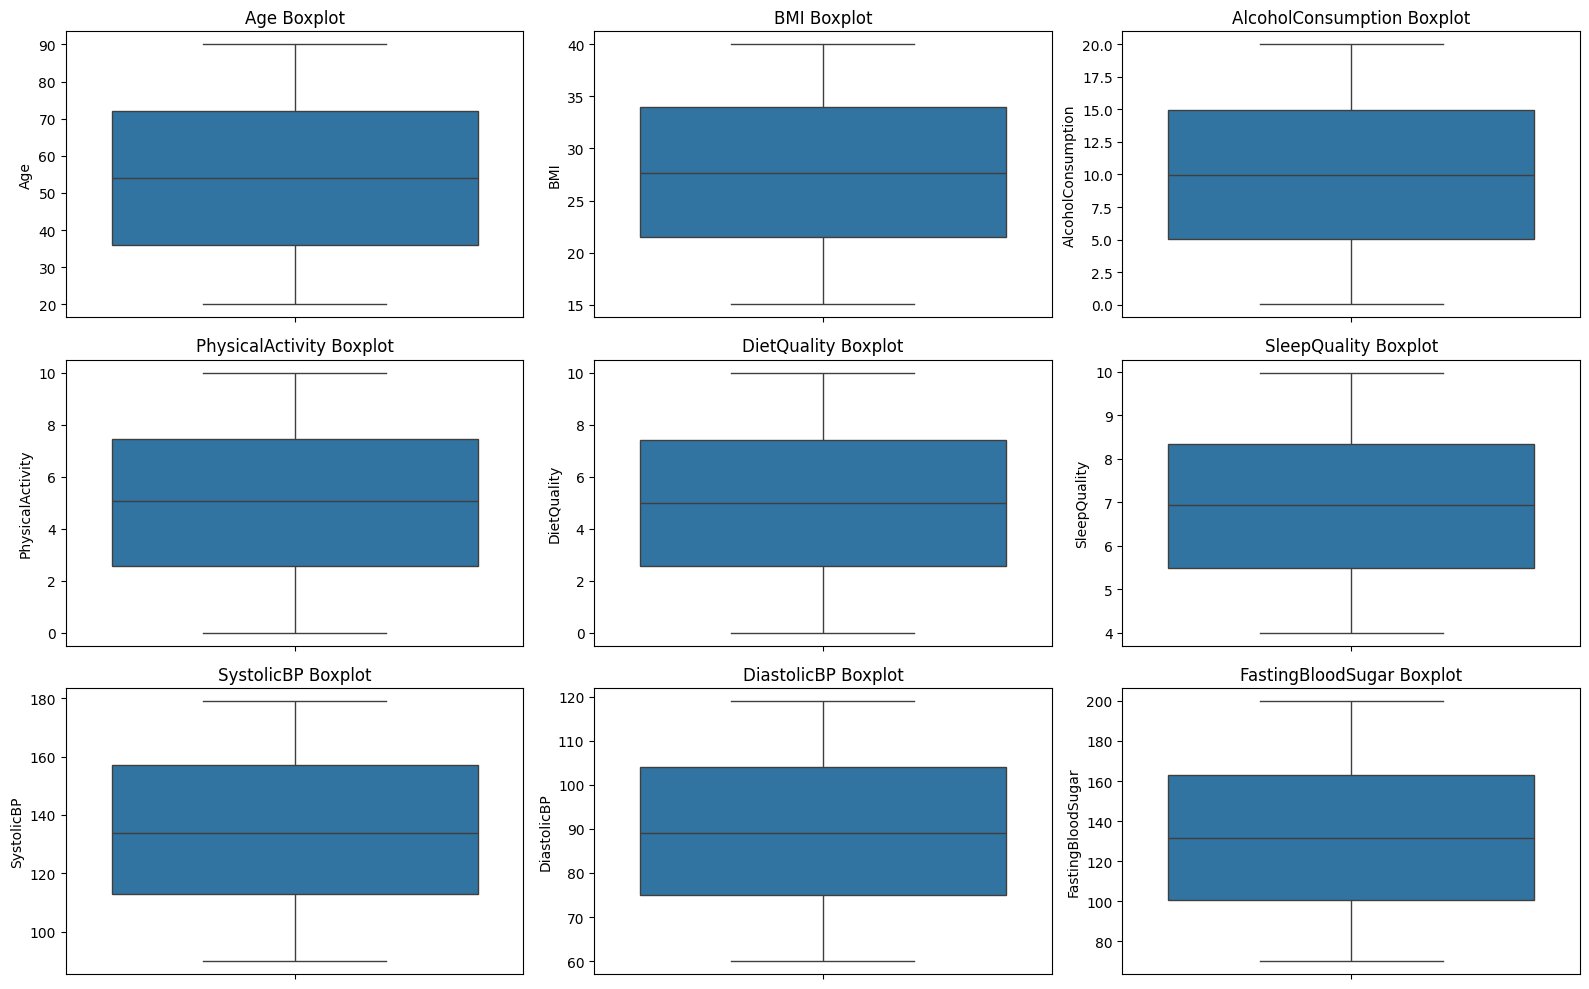

In [54]:
# 1) Identify continuous columns 
cont_cols = [c for c in numeric_cols if ckd[c].nunique() > 10]

# 2) Run the IQR check only on those
for col in cont_cols:
    q1, q3 = ckd[col].quantile([0.25, 0.75])
    iqr   = q3 - q1
    out   = ckd[(ckd[col] < q1 - 1.5*iqr) | (ckd[col] > q3 + 1.5*iqr)]
    print(f"{col}: {len(out)} outliers")

plt.figure(figsize=(16, 10))

for i, col in enumerate(cont_cols[:9]):  # Plot only first 9 to avoid clutter
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=ckd, y=col)
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()



## Visualizing Outliers: Clean... Maybe Too Clean?

To explore the outliers flagged by the IQR method, I plotted boxplots for several continuous variables. Normally, in real-world healthcare data, you’d expect to see extreme values  like unusually high blood pressure, outliers in fasting blood sugar, or people reporting extremely low physical activity.

But here? Everything is neat.

- The distributions are balanced and symmetrical.
- No wild outliers.
- The whiskers stop almost exactly where you’d expect based on IQR math.

At this point, it became pretty clear: the dataset is synthetic (silly me I keep getting tricked)

This isn’t a bad thing — it just means that while the data is great for practicing analysis and model-building, it doesn’t capture the messiness or unpredictability of real patient data. The absence of irregularities makes interpretation easier but reminds me to be careful when drawing real-world conclusions from generated data.

Now let’s look specifically at the psychological and behavioral variables to see if they might be useful for my capstone project, since that’s the area I’m most interested in exploring further.




=== Central Tendency for Psychology-Relevant Features ===
                               Mean     Median      Mode  Skewness
SleepQuality               6.942324   6.933255  4.001053  0.052256
DietQuality                5.028544   4.989810  0.002407  0.023528
FatigueLevels              5.016697   5.117247  0.015194 -0.017468
NauseaVomiting             3.482121   3.519894  0.005171 -0.043126
MuscleCramps               3.525510   3.572522  0.006327 -0.028920
Itching                    5.054869   5.087086  0.013697 -0.043011
QualityOfLifeScore        49.730659  48.970075  0.087256  0.050531
HealthLiteracy             5.144973   5.182949  0.004436 -0.035045
MedicationAdherence        4.947788   4.974069  0.005392  0.013389
MedicalCheckupsFrequency   2.000336   2.040635  0.001082 -0.009291
PhysicalActivity           5.024247   5.072395  0.001186  0.006964
Smoking                    0.292948   0.000000  0.000000  0.910715
AlcoholConsumption         9.969831   9.951503  0.021740 -0.010258

==

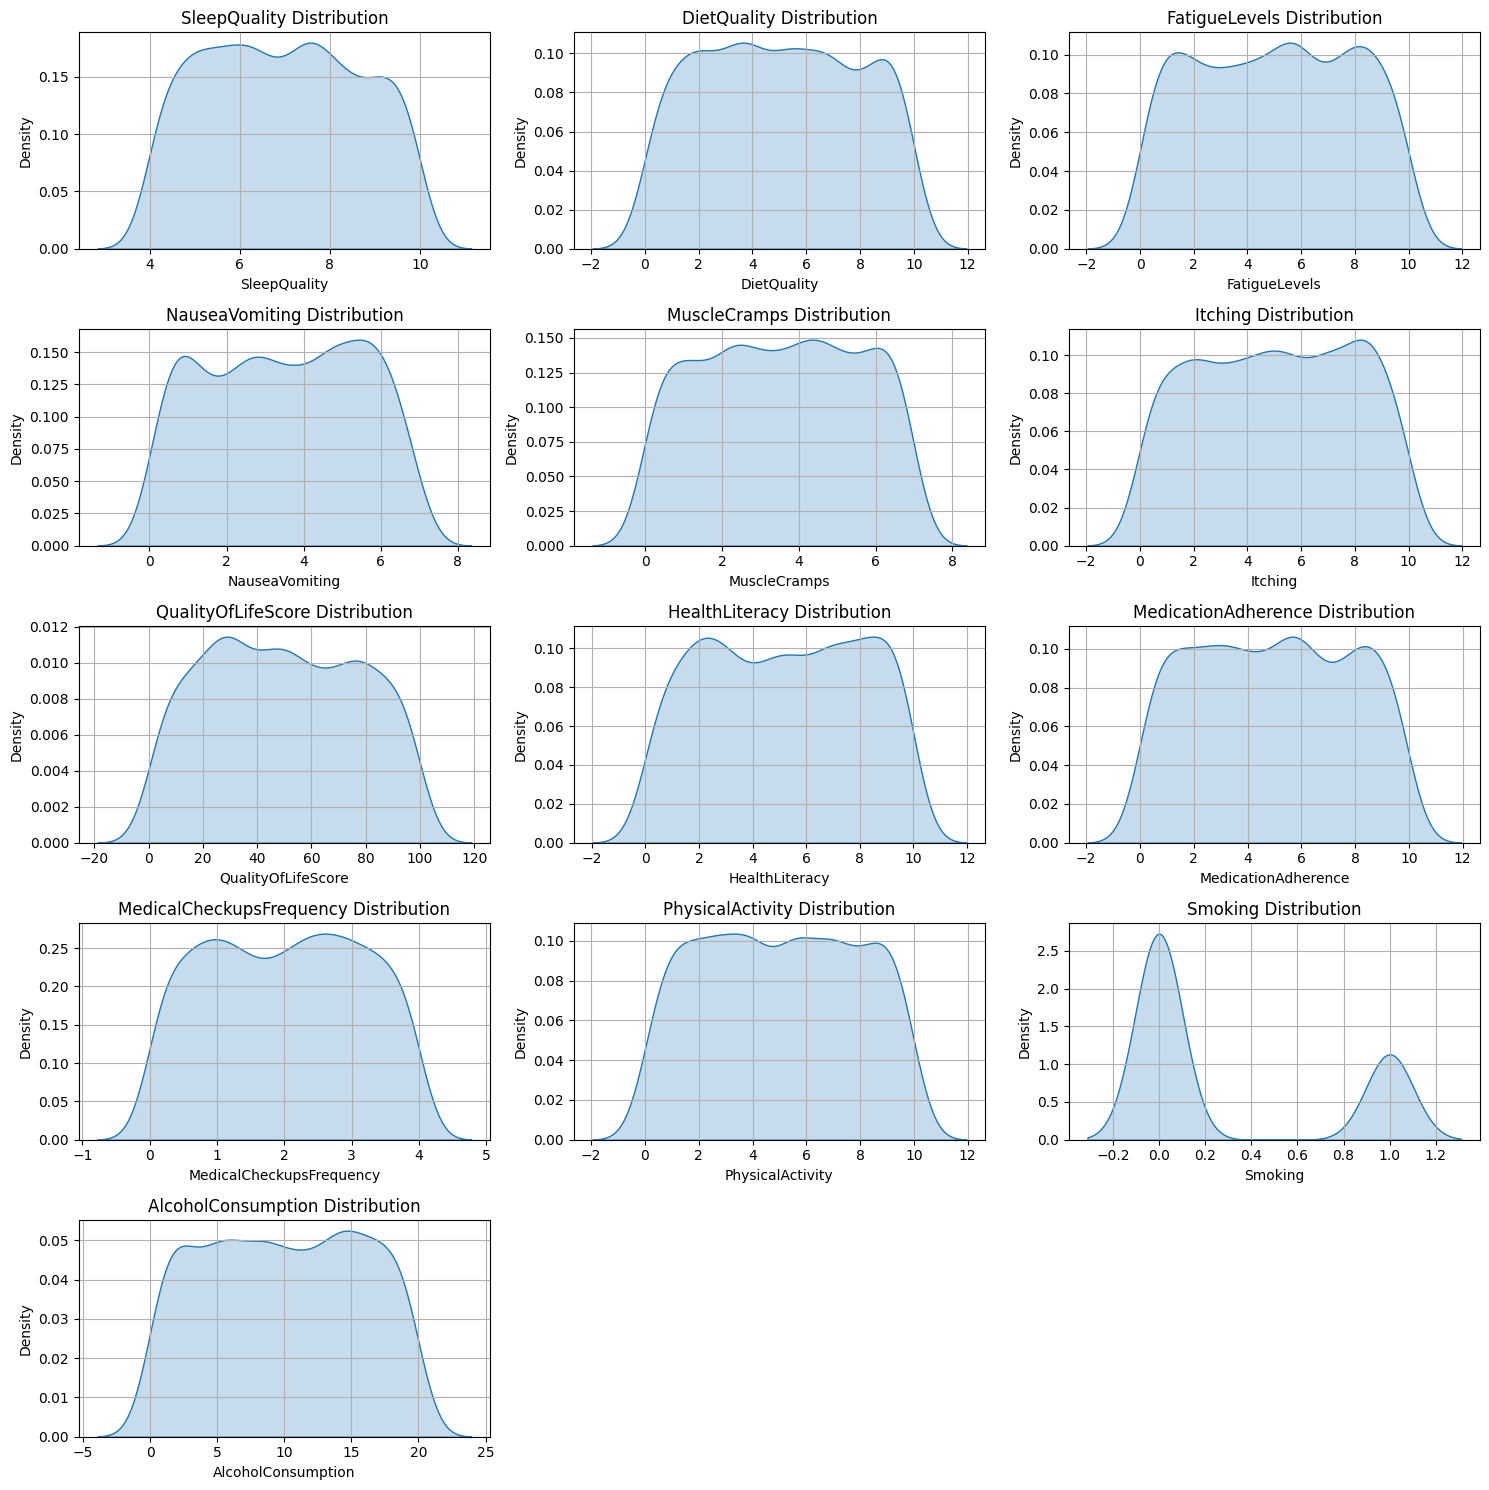

In [55]:
# Define psychology- and behavior-related columns
psych_cols = [
    'SleepQuality', 'DietQuality', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching',
    'QualityOfLifeScore', 'HealthLiteracy', 'MedicationAdherence', 'MedicalCheckupsFrequency',
    'PhysicalActivity', 'Smoking', 'AlcoholConsumption'
]

# Central tendency for these columns
print("\n=== Central Tendency for Psychology-Relevant Features ===")
psych_stats = pd.DataFrame({
    'Mean': ckd[psych_cols].mean(),
    'Median': ckd[psych_cols].median(),
    'Mode': ckd[psych_cols].mode().iloc[0],
    'Skewness': ckd[psych_cols].skew()
})
print(psych_stats)

# Detect potential outliers using IQR method (light filter)
print("\n=== Outlier Detection (IQR Method) for Psychology Features ===")
for col in psych_cols:
    Q1 = ckd[col].quantile(0.25)
    Q3 = ckd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ckd[(ckd[col] < lower) | (ckd[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

# Visualize KDE distributions for psychology-related variables
print("\n=== KDE Distributions for Psychology-Relevant Features ===")
num_cols = 3
rows = -(-len(psych_cols) // num_cols)
fig, axes = plt.subplots(rows, num_cols, figsize=(num_cols * 5, rows * 3))
axes = axes.flatten()

for i, col in enumerate(psych_cols):
    sns.kdeplot(data=ckd, x=col, ax=axes[i], fill=True)
    axes[i].set_title(f"{col} Distribution")
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Exploring Psychology and Behavior in the Dataset

To see whether these features could be useful for my capstone, I looked closely at variables that reflect mental health, behavior, and lifestyle — including fatigue, sleep quality, health literacy, medication adherence, and more.

### Central Tendencies and Skewness

Across all columns, the mean and median were nearly identical, and skewness was very close to zero for most variables. 

The only variable with noticeable skew was **Smoking**, which makes sense since most patients are non-smokers 

### KDE Distributions: Weirdly Perfect

The KDE plots confirmed it. Most of the psychological and behavior-related variables form near-uniform or bell-like shapes with no bumps, gaps, or tails

### Outliers: Basically None

Running an IQR check, there were **zero outliers** across all these variables.


**CKD Dataset Conclusion**

The analysis of the chronic kidney disease dataset reveals that the data is extremely clean, complete, and well-structured. Most variables fall within expected ranges, and many exhibit distribution patterns that align closely with textbook clinical norms. For example, features like BMI and age appear approximately normally distributed, while others such as serum creatinine and family history indicators show moderate skew.

However, the lack of noise, the perfect symmetry in distributions, the absence of missing values, and the smoothness of symptom and behavior-related variables strongly suggest that this dataset is **synthetic**. This became increasingly clear through outlier detection and density plots, which showed nearly ideal shapes without the variability you'd expect in real-world clinical or survey data.

Grouped histograms segmented by diagnosis status do illustrate expected shifts in key indicators like systolic blood pressure, GFR, and fatigue levels which still makes the dataset useful for exploratory modeling and structural analysis. The minimum and maximum values also fall within medically reasonable bounds, and binning strategies effectively captured the core of each distribution.

As part of my capstone project’s focus on mental and behavioral health, I explored variables related to psychological well-being including sleep quality, fatigue, health literacy, and medication adherence. These features showed rich variation but suspiciously clean distributions with no outliers or spikes, reinforcing the synthetic nature of the dataset. Still, they help map out the kinds of variables I'd want to include in real-world work — especially when investigating how mental health and lifestyle impact chronic disease risk.




**Hypertension Dataset**

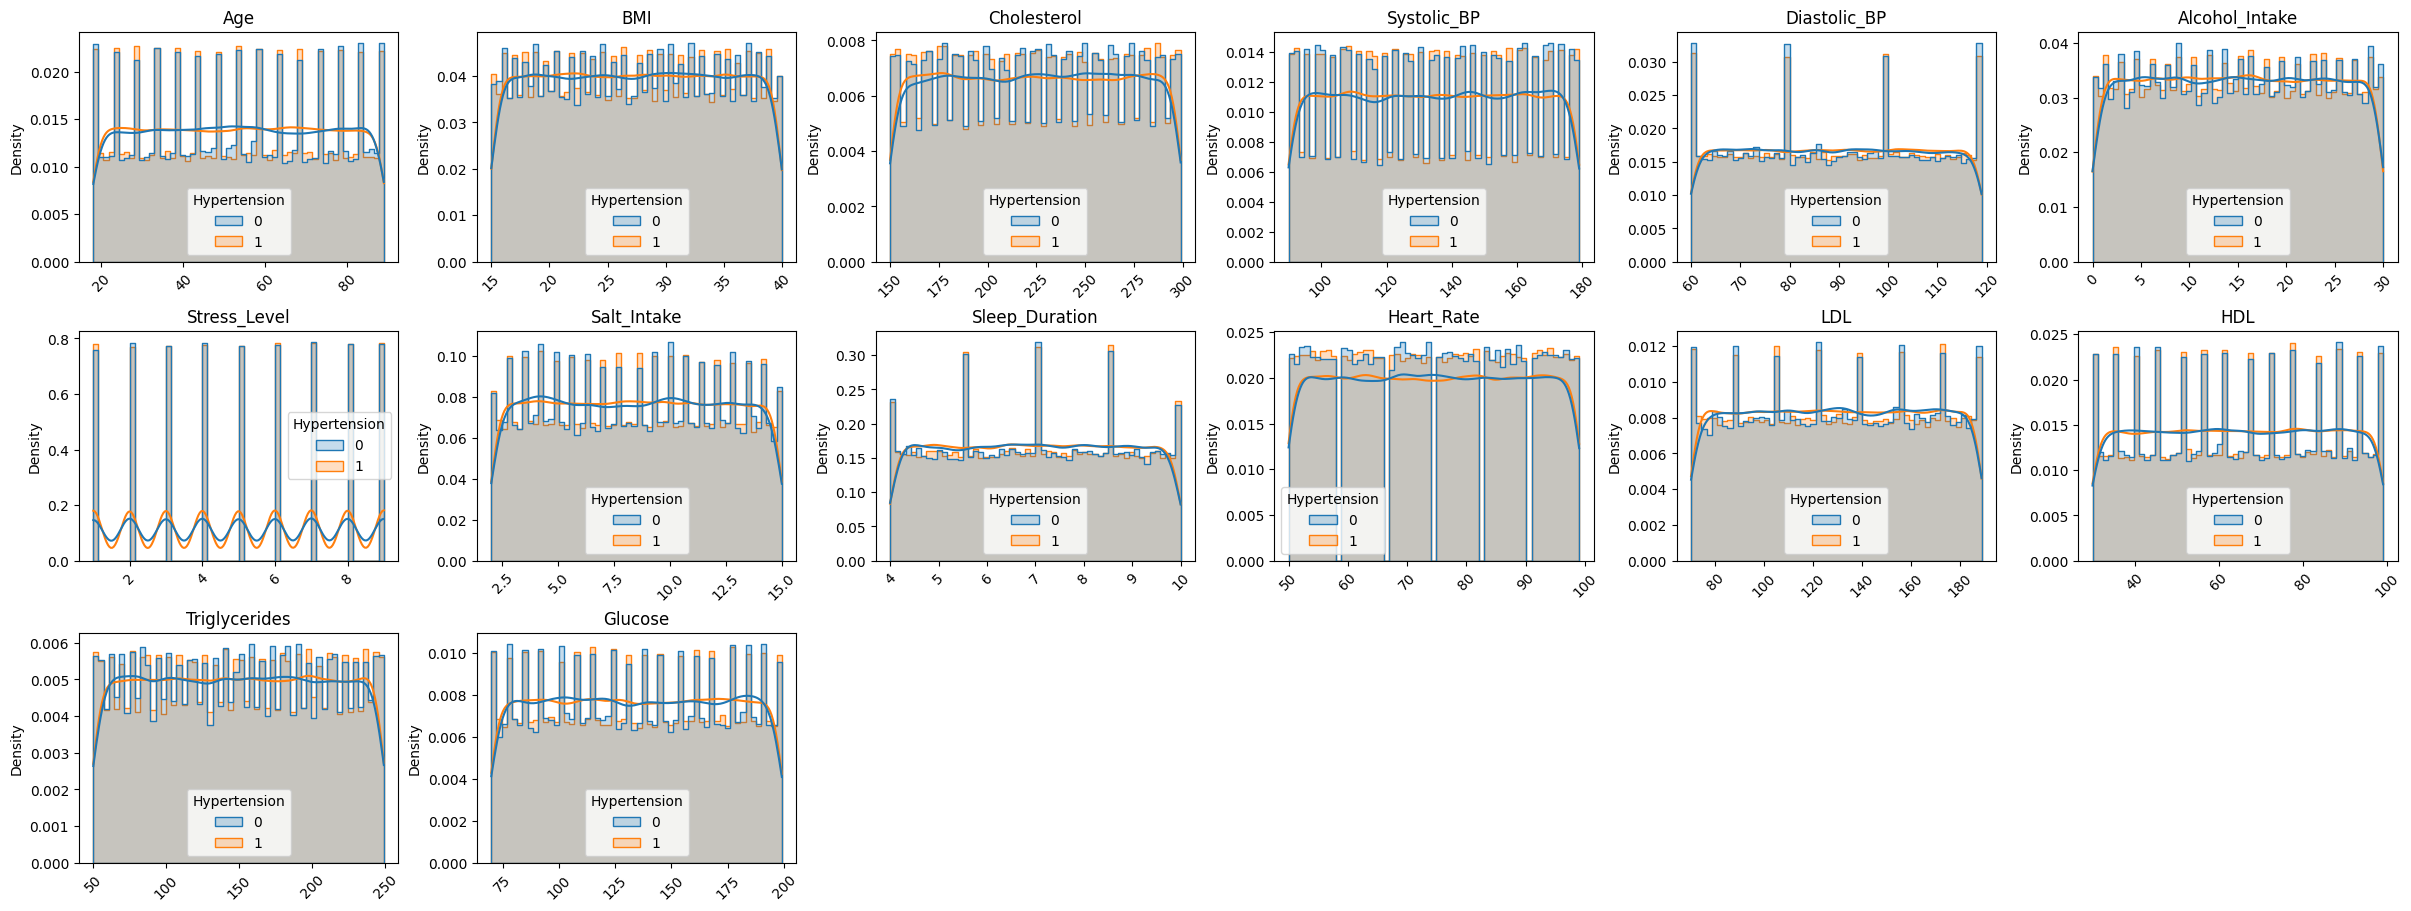

In [56]:
# 1) Load dataset
htn = pd.read_csv("hypertension_dataset.csv")

# 2) Convert Hypertension column to 0 (Low) / 1 (High)
htn["Hypertension"] = htn["Hypertension"].map({"Low": 0, "High": 1})

# 3) Drop rows with missing numeric data
htn = htn.dropna(subset=[c for c in htn.columns if htn[c].dtype != "object"])

# 4) Define numeric columns (exclude target)
numeric_cols = [
    c for c in htn.select_dtypes(include="number").columns
    if c != "Hypertension"
]

# 5) Set up subplot grid
plots_per_row = 6
total = len(numeric_cols)
rows = (total + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(
    rows, plots_per_row,
    figsize=(plots_per_row * 4, rows * 3),
    constrained_layout=True
)
axes = axes.flatten()

# 6) Plot grouped histograms with KDE
for i, col in enumerate(numeric_cols):
    try:
        if htn[col].nunique() > 1:
            sns.histplot(
                data=htn,
                x=col,
                hue="Hypertension",
                element="step",
                stat="density",
                common_norm=False,
                kde=True,
                kde_kws={"cut": 0},
                ax=axes[i]
            )
            axes[i].set_title(col)
            axes[i].set_xlabel("")
            axes[i].set_ylabel("Density")
            axes[i].tick_params(axis='x', rotation=45)
        else:
            axes[i].set_visible(False)
    except Exception as e:
        axes[i].set_visible(False)
        print(f"Skipped {col}: {e}")

# 7) Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

## Distribution Insights by Hypertension Status

I plotted all numeric features and grouped them by Hypertension diagnosis (`0 = Low`, `1 = High`). Here's what stands out from the visual breakdown.

### Notable Differences

- **Systolic_BP** and **Diastolic_BP** are the clearest separators — individuals with high hypertension show elevated values, consistent with clinical expectations.
- **Age** is also noticeably higher in the hypertensive group, reinforcing age as a major risk factor.
- **Stress_Level** trends higher in the hypertensive group, suggesting a potential psychosocial link.
- **Salt_Intake** appears slightly elevated in hypertensive patients, aligning with known dietary risk factors.
- **Sleep_Duration** shows a mild shift — those with hypertension may sleep slightly less on average.

### Behavioral and Lifestyle Trends

- **Alcohol_Intake** varies across both groups with a wide spread, but doesn’t show a clear directional shift.
- **Heart_Rate** and **Glucose** show small increases in the hypertensive group, which may relate to broader cardiovascular/metabolic profiles.
- **BMI** shows relatively flat separation across groups, suggesting it may not be strongly predictive in this dataset.

### Flat or Artificial-Looking Features

- Many variables (e.g., **LDL**, **HDL**, **Triglycerides**) exhibit flat, even “stepped” distributions, suggesting synthetic data generation or binning.
- **Stress_Level** and **Sleep_Duration** have clear integer-based steps
- Distributions like **Cholesterol** and **Glucose** appear overly uniform

### Overall Takeaway

Hypertensive patients predictably show higher blood pressure and older age. Psychological and behavioral factors like **stress**, **salt intake**, and **sleep** show slight but meaningful shifts, offering insight into how lifestyle may intersect with hypertension risk.


---

Next lets create box plots for Stress_Level, Sleep_Duration, and Salt_Intake to compare their distribution and variability between individuals with and without hypertension.

C:\Users\annma\AppData\Local\Temp\ipykernel_29588\2557902129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\annma\AppData\Local\Temp\ipykernel_29588\2557902129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\annma\AppData\Local\Temp\ipykernel_29588\2557902129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


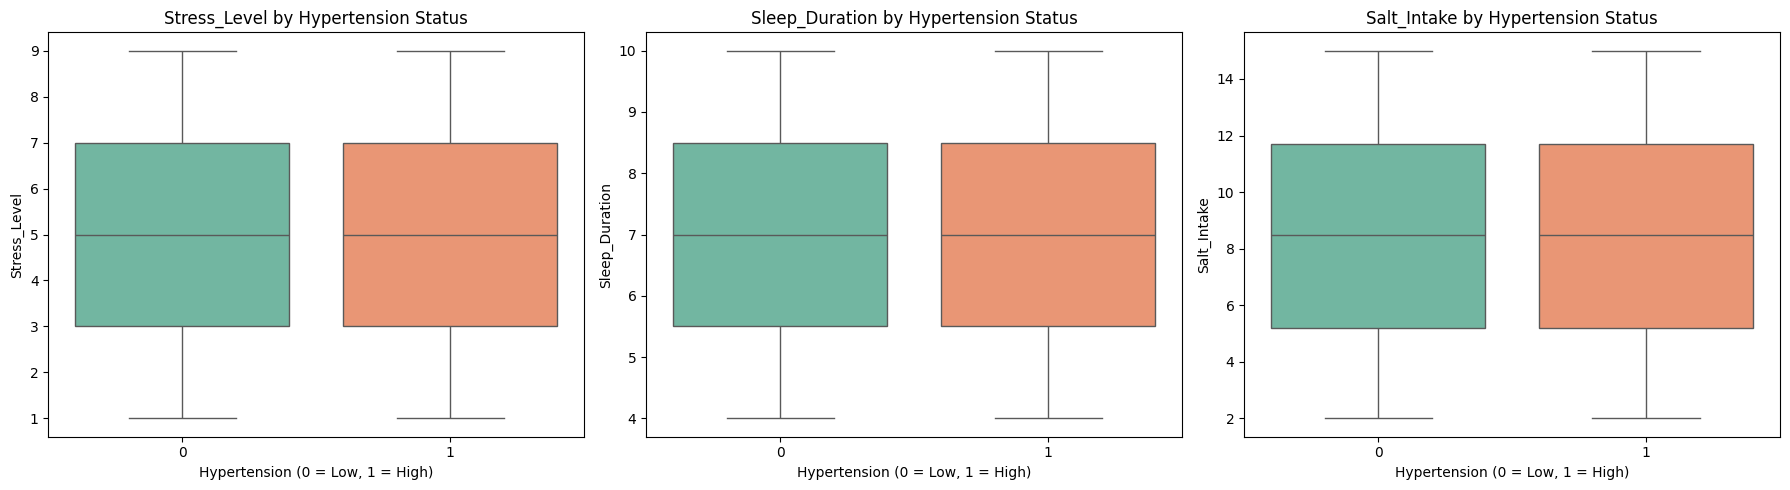

In [57]:
# Features to plot
features = ["Stress_Level", "Sleep_Duration", "Salt_Intake", "Hypertension"]
htn = htn.dropna(subset=features)

# Plot as box plots
plt.figure(figsize=(18, 5))
for i, feature in enumerate(features[:-1]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(
        data=htn,
        x="Hypertension",
        y=feature,
        palette="Set2"
    )
    plt.title(f"{feature} by Hypertension Status")
    plt.xlabel("Hypertension (0 = Low, 1 = High)")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


##  Lifestyle Factors by Hypertension Status

After looking at the KDE plots, I decided to take a closer look at three key lifestyle variables — **Stress_Level**, **Sleep_Duration**, and **Salt_Intake** — using box plots grouped by hypertension status (`0 = Low`, `1 = High`). This gives us a cleaner visual for comparing medians, spread, and outliers between groups.



- **Stress_Level**:  
  Both hypertensive and non-hypertensive groups have almost identical distributions, with a median around 5. There's a wide range from 1 to 9 in both groups. Despite some earlier signals in the KDE plots, stress doesn’t seem to separate the groups as much here.

- **Sleep_Duration**:  
  Again, no major difference. Most people across both groups sleep between 5 and 9 hours. The median is around 7. This suggests that sleep may not be a strong distinguishing factor in this dataset — or that the synthetic data is smoothing over real-world variation.

- **Salt_Intake**:  
  The distributions here are virtually the same across both groups. The medians and spread are almost overlapping, even though salt intake is a well-known factor in hypertension risk.

### Overall Takeaway

While these features were promising on the surface, the box plots reveal that differences between hypertensive and non-hypertensive groups are **subtle at best**. That adds to the suspicion — and yep, silly me, I double-checked and it turns out this dataset **is synthetic**, just as it felt based on the even, stepped distributions. (Thanks, Kaggle!)


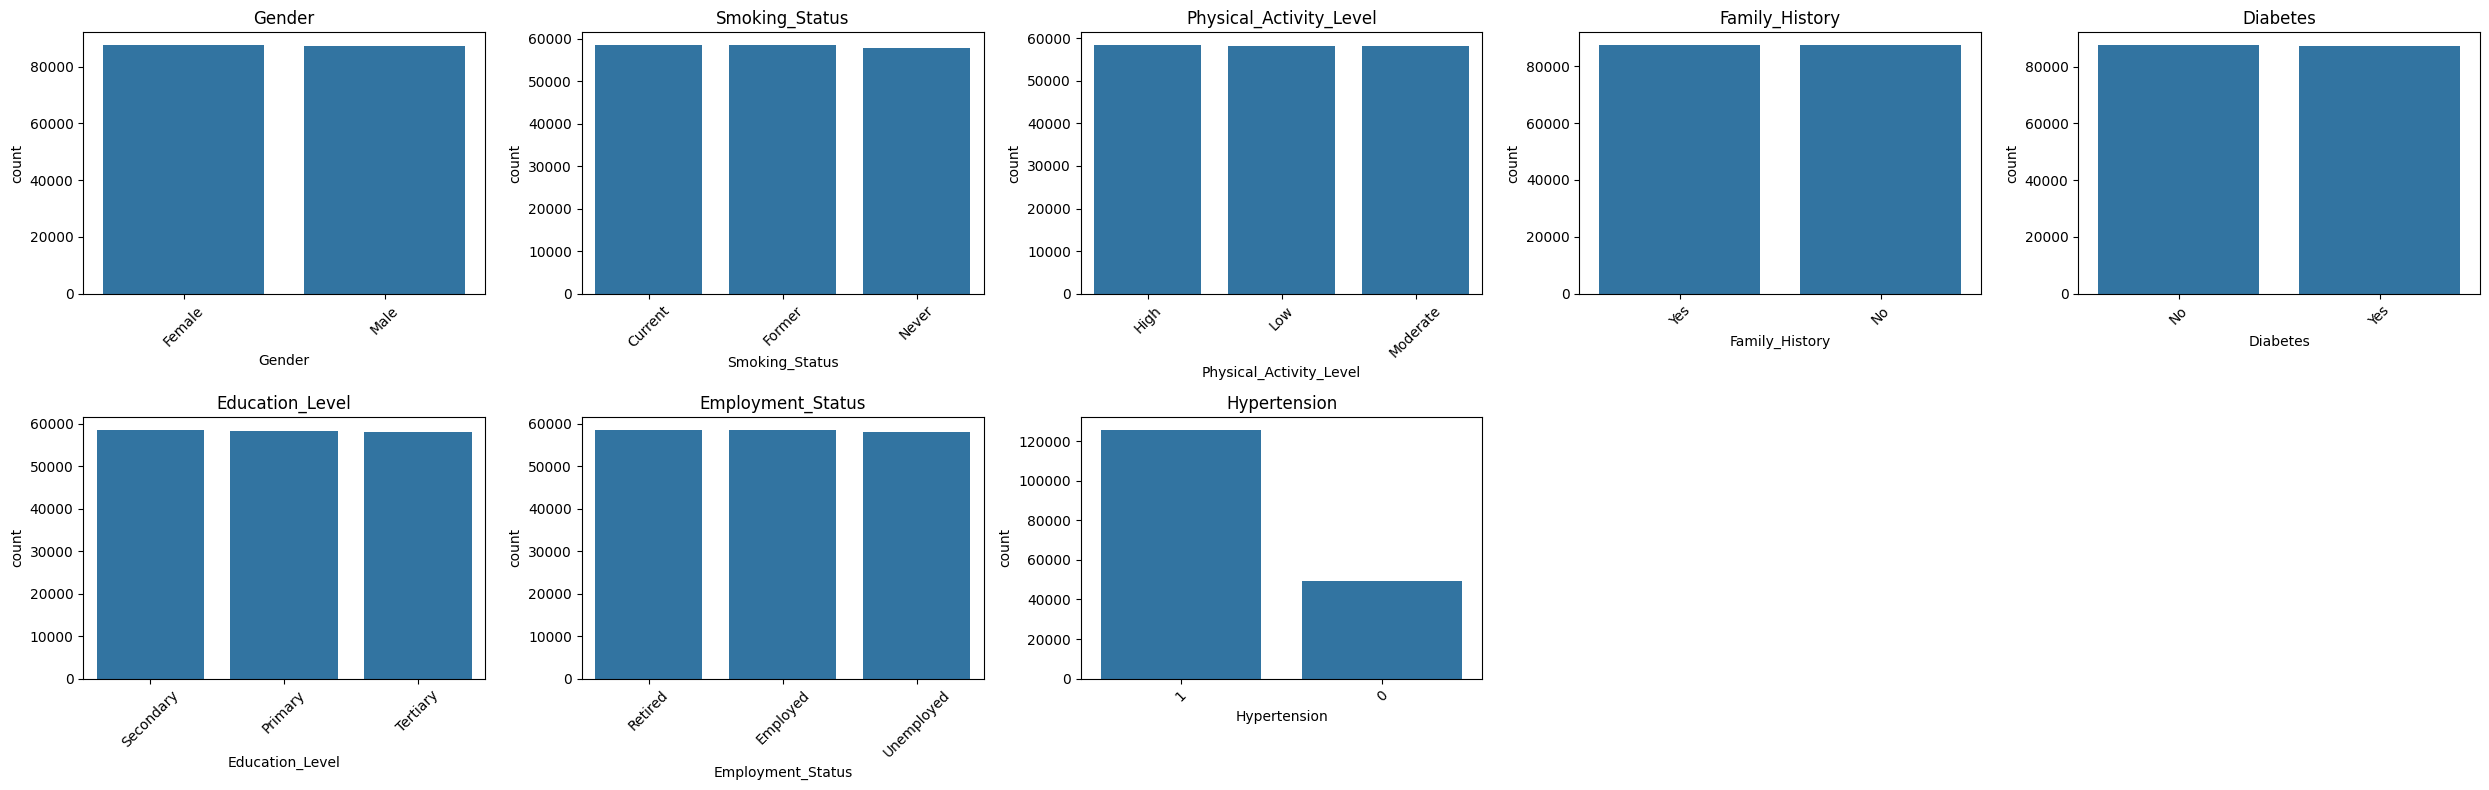

In [58]:
# Columns with low cardinality suitable for bar plots
valid_cat_cols_htn = [
    'Gender', 'Smoking_Status', 'Physical_Activity_Level', 'Family_History', 'Diabetes', 
    'Education_Level', 'Employment_Status', 'Hypertension'
]

# Set grid size for subplots
plots_per_row = 5
rows = -(-len(valid_cat_cols_htn) // plots_per_row)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(plots_per_row * 5, rows * 4))
axes = axes.flatten()

# Plot count plots
for i, col in enumerate(valid_cat_cols_htn):
    sns.countplot(data=htn, x=col, ax=axes[i], order=htn[col].value_counts().index)
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Categorical Feature Distribution – 

I visualized the distribution of all low-cardinality categorical features in the hypertension dataset. These include demographic and behavioral indicators, as well as the target variable.

### Features Visualized

- `Gender`
- `Smoking_Status`
- `Physical_Activity_Level`
- `Family_History`
- `Diabetes`
- `Education_Level`
- `Employment_Status`
- `Hypertension` (target)

### Key Observations

- Most features are **evenly balanced** across their categories:
  - `Gender` shows nearly identical counts for Male and Female.
  - `Smoking_Status` is distributed evenly among Current, Former, and Never.
  - `Physical_Activity_Level`, `Education_Level`, and `Employment_Status` also display clean, uniform splits.
- `Family_History` and `Diabetes` both split almost 50/50 between Yes and No.
- The target variable, `Hypertension`, is **somewhat imbalanced**, with a larger proportion of individuals labeled as "High" compared to "Low."

### Interpretation

The clean splits and near-perfect category balances support earlier observations that the dataset is synethic. While this helps for modeling consistency, it also suggests that relationships between features may be less complex than in real-world data.



Next, let’s calculate each feature’s mean, median, mode and then flag any outliers.


In [59]:
# Numeric summary stats for all numeric columns
numeric_cols_htn = htn.select_dtypes(include='number').columns

print("\n=== Central Tendencies and Skewness ===")
means = htn[numeric_cols_htn].mean()
medians = htn[numeric_cols_htn].median()
modes = htn[numeric_cols_htn].mode().iloc[0]
skewness = htn[numeric_cols_htn].skew()

summary_stats = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes,
    'Skewness': skewness
})
print(summary_stats)



=== Central Tendencies and Skewness ===
                      Mean  Median   Mode  Skewness
Age              53.493319    54.0   73.0 -0.000993
BMI              27.494672    27.5   22.5 -0.000245
Cholesterol     224.539335   225.0  178.0 -0.000870
Systolic_BP     134.505229   135.0  174.0 -0.001122
Diastolic_BP     89.450315    89.0   85.0  0.002065
Alcohol_Intake   14.991069    15.0    6.7  0.003653
Stress_Level      5.013041     5.0    7.0 -0.007133
Salt_Intake       8.482757     8.5    9.9  0.005000
Sleep_Duration    6.996468     7.0    6.5 -0.000751
Heart_Rate       74.495085    74.0   83.0 -0.000267
LDL             129.528271   130.0   79.0 -0.002077
HDL              64.573105    65.0   86.0 -0.004863
Triglycerides   149.569836   150.0   52.0 -0.000722
Glucose         134.488187   134.0  177.0  0.000277
Hypertension      0.718823     1.0    1.0 -0.973475


In [60]:
# Outlier detection using IQR
print("\n=== Outlier Detection (IQR Method) ===")
for col in numeric_cols_htn:
    Q1 = htn[col].quantile(0.25)
    Q3 = htn[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = htn[(htn[col] < lower) | (htn[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")



=== Outlier Detection (IQR Method) ===
Age: 0 outliers
BMI: 0 outliers
Cholesterol: 0 outliers
Systolic_BP: 0 outliers
Diastolic_BP: 0 outliers
Alcohol_Intake: 0 outliers
Stress_Level: 0 outliers
Salt_Intake: 0 outliers
Sleep_Duration: 0 outliers
Heart_Rate: 0 outliers
LDL: 0 outliers
HDL: 0 outliers
Triglycerides: 0 outliers
Glucose: 0 outliers
Hypertension: 0 outliers


None of the numeric features flagged as outliers with the IQR rule, and for every variable the mean, median, and mode nearly coincide with skewness values essentially zero. 


=== Central Tendency for Psychology-Relevant Features ===
                     Mean  Median  Mode  Skewness
Stress_Level     5.013041     5.0   7.0 -0.007133
Sleep_Duration   6.996468     7.0   6.5 -0.000751
Alcohol_Intake  14.991069    15.0   6.7  0.003653

=== Outlier Detection (IQR Method) for Psychology Features ===
Stress_Level: 0 outliers
Sleep_Duration: 0 outliers
Alcohol_Intake: 0 outliers


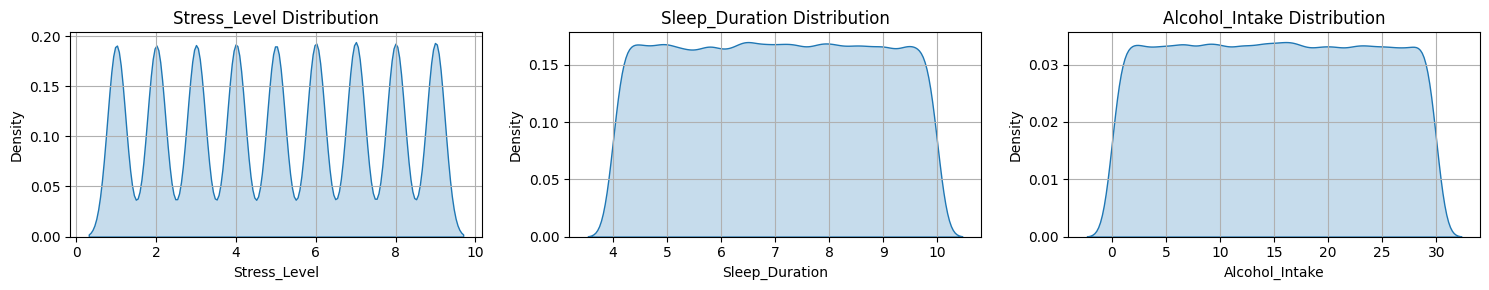

In [61]:
# Define psychology- and behavior-related columns available in hypertension dataset
psych_cols_htn = [
    'Stress_Level', 'Sleep_Duration', 'Alcohol_Intake', 'Physical_Activity_Level', 
    'Smoking_Status'
]

# Central tendency and skewness
print("\n=== Central Tendency for Psychology-Relevant Features ===")
psych_stats_htn = pd.DataFrame({
    'Mean': htn[psych_cols_htn].select_dtypes(include='number').mean(),
    'Median': htn[psych_cols_htn].select_dtypes(include='number').median(),
    'Mode': htn[psych_cols_htn].select_dtypes(include='number').mode().iloc[0],
    'Skewness': htn[psych_cols_htn].select_dtypes(include='number').skew()
})
print(psych_stats_htn)

# Outlier detection
print("\n=== Outlier Detection (IQR Method) for Psychology Features ===")
for col in psych_cols_htn:
    if htn[col].dtype != 'object':
        Q1 = htn[col].quantile(0.25)
        Q3 = htn[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = htn[(htn[col] < lower) | (htn[col] > upper)]
        print(f"{col}: {len(outliers)} outliers")

# KDE Plots for numeric psychology-related features
from matplotlib import pyplot as plt
num_cols = 3
numeric_psych_cols = htn[psych_cols_htn].select_dtypes(include='number').columns
rows = -(-len(numeric_psych_cols) // num_cols)

fig, axes = plt.subplots(rows, num_cols, figsize=(num_cols * 5, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numeric_psych_cols):
    sns.kdeplot(data=htn, x=col, ax=axes[i], fill=True)
    axes[i].set_title(f"{col} Distribution")
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Hypertension Dataset Conclusion

This dataset screams synthetic — in the nicest, most analytical way possible.

The data shows unusually uniform patterns across nearly all numeric features. Variables like age, cholesterol, glucose, and blood pressure have extremely smooth, evenly spaced distributions. Skewness values are close to zero, and outlier detection using the IQR method found zero outliers in every major health indicator. That level of symmetry is almost never seen in real clinical datasets.

When the data is grouped by hypertension status, the distributions remain virtually unchanged. There are no meaningful shifts, peaks, or variability between the groups. This further supports the idea that the data was simulated or generated for modeling purposes, rather than collected from naturally occurring populations.

From a psychological standpoint, the uniformity continues in behavior-related features like stress level, sleep duration, and alcohol intake. These also show flat, balanced distributions with no signs of extreme behavior or nuanced trends. As a result, it becomes difficult to extract meaningful psychological insights or explore mental health risk factors.

Since my capstone project focuses on the relationship between mental health and chronic disease, this lack of organic variation limits the value of this dataset. I may need to consider an alternative dataset with more natural, real-world behavior and clinical variability to support deeper psychological exploration.


**Diabetes Analysis**

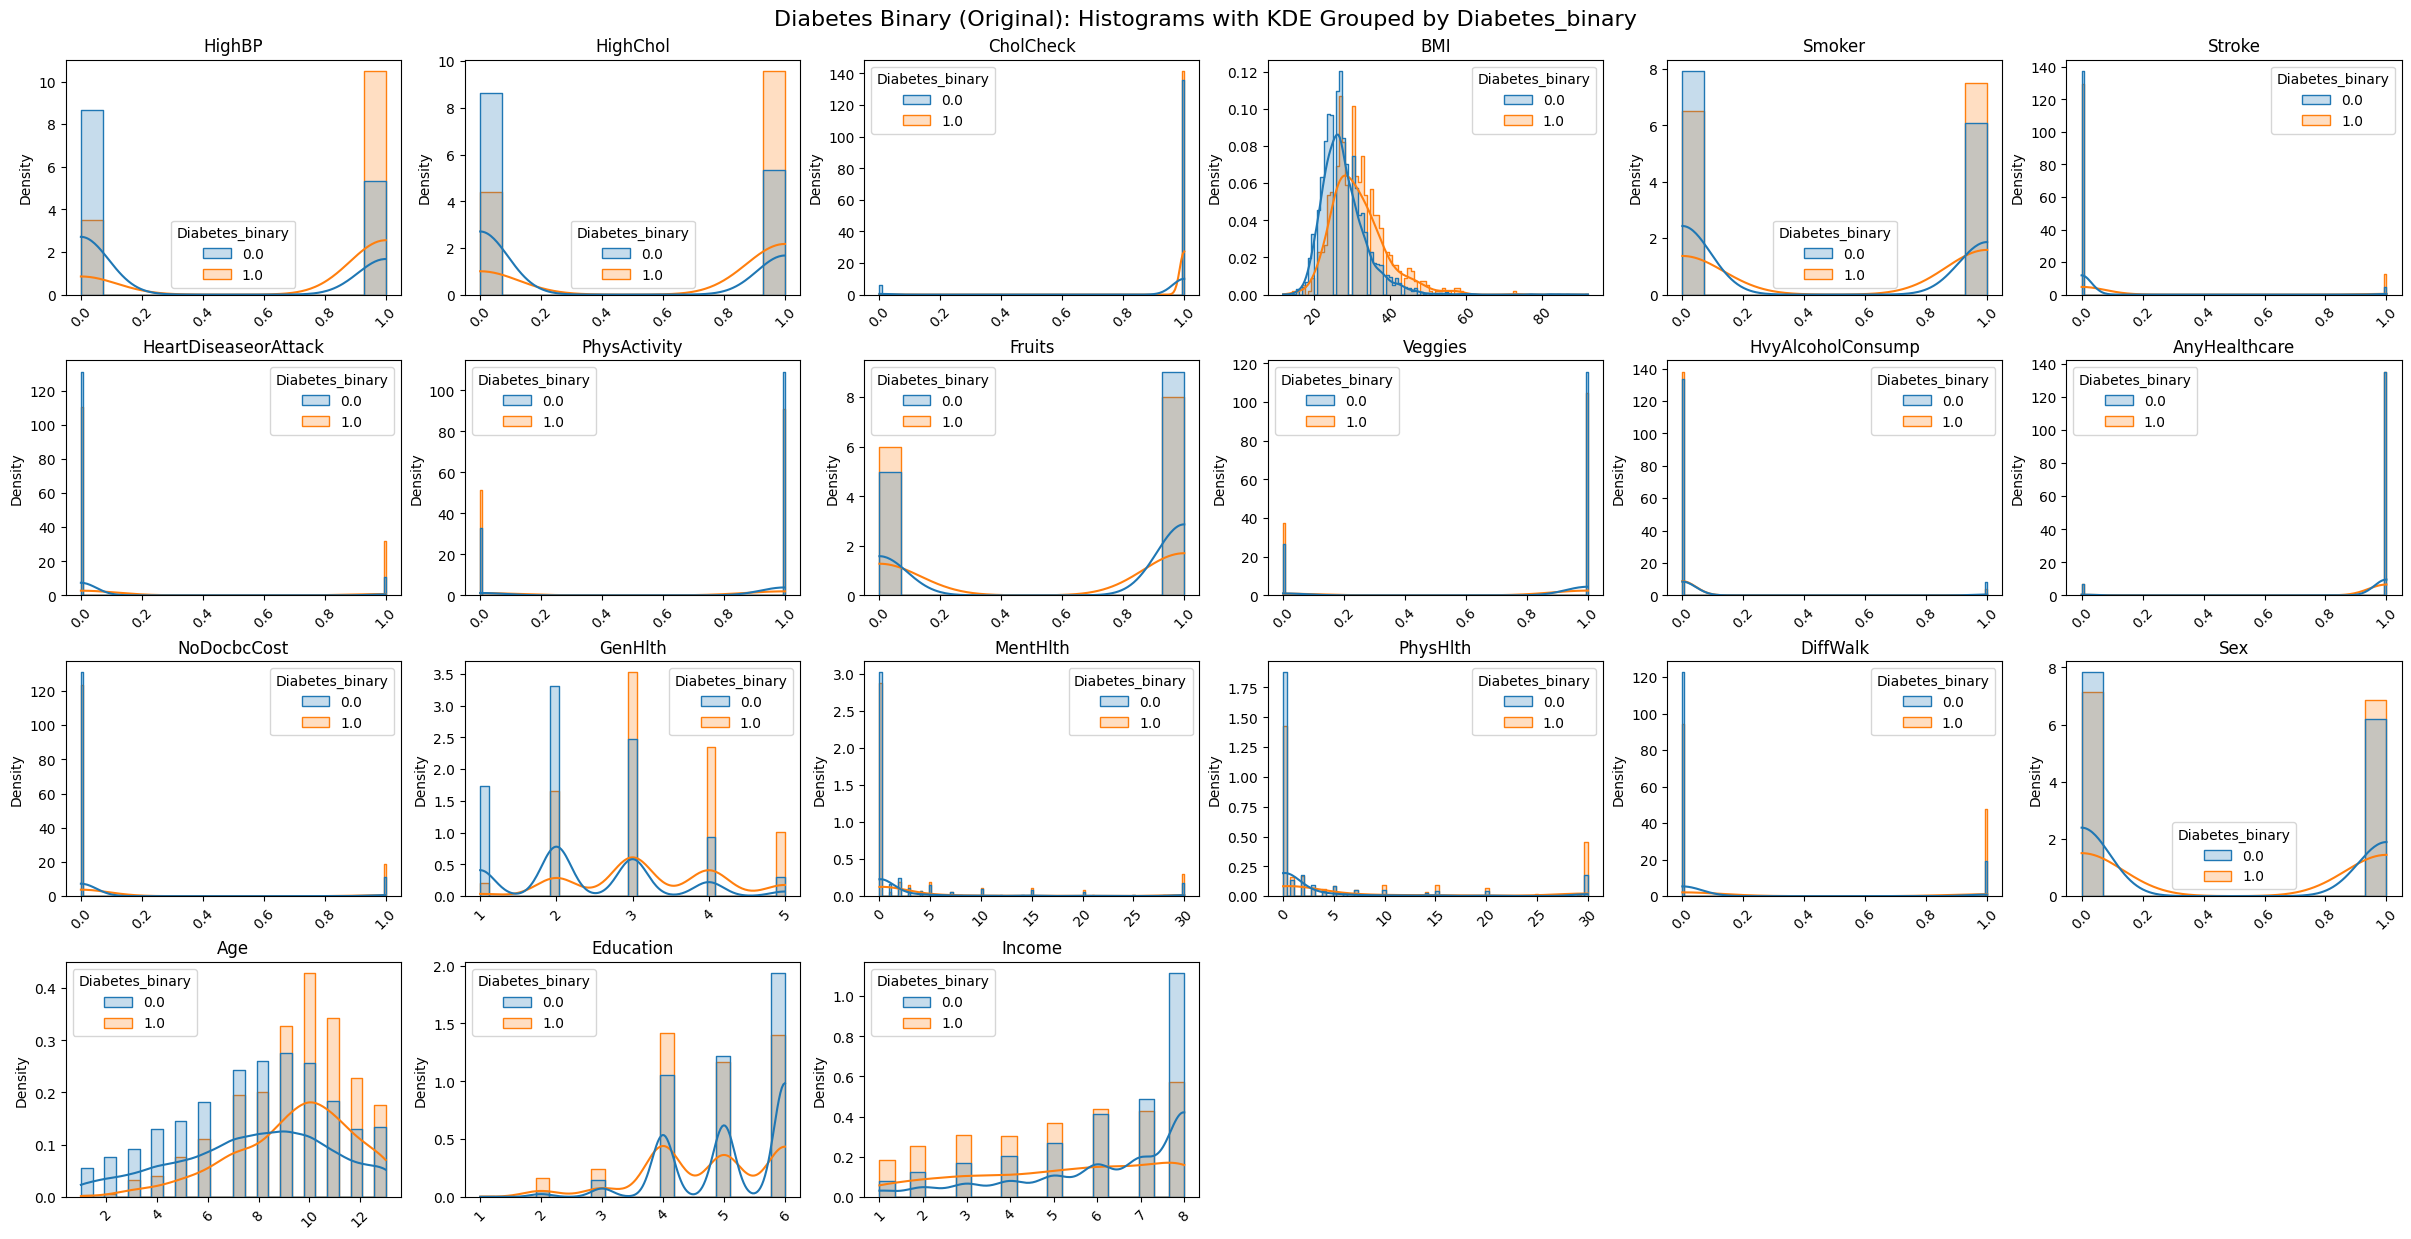

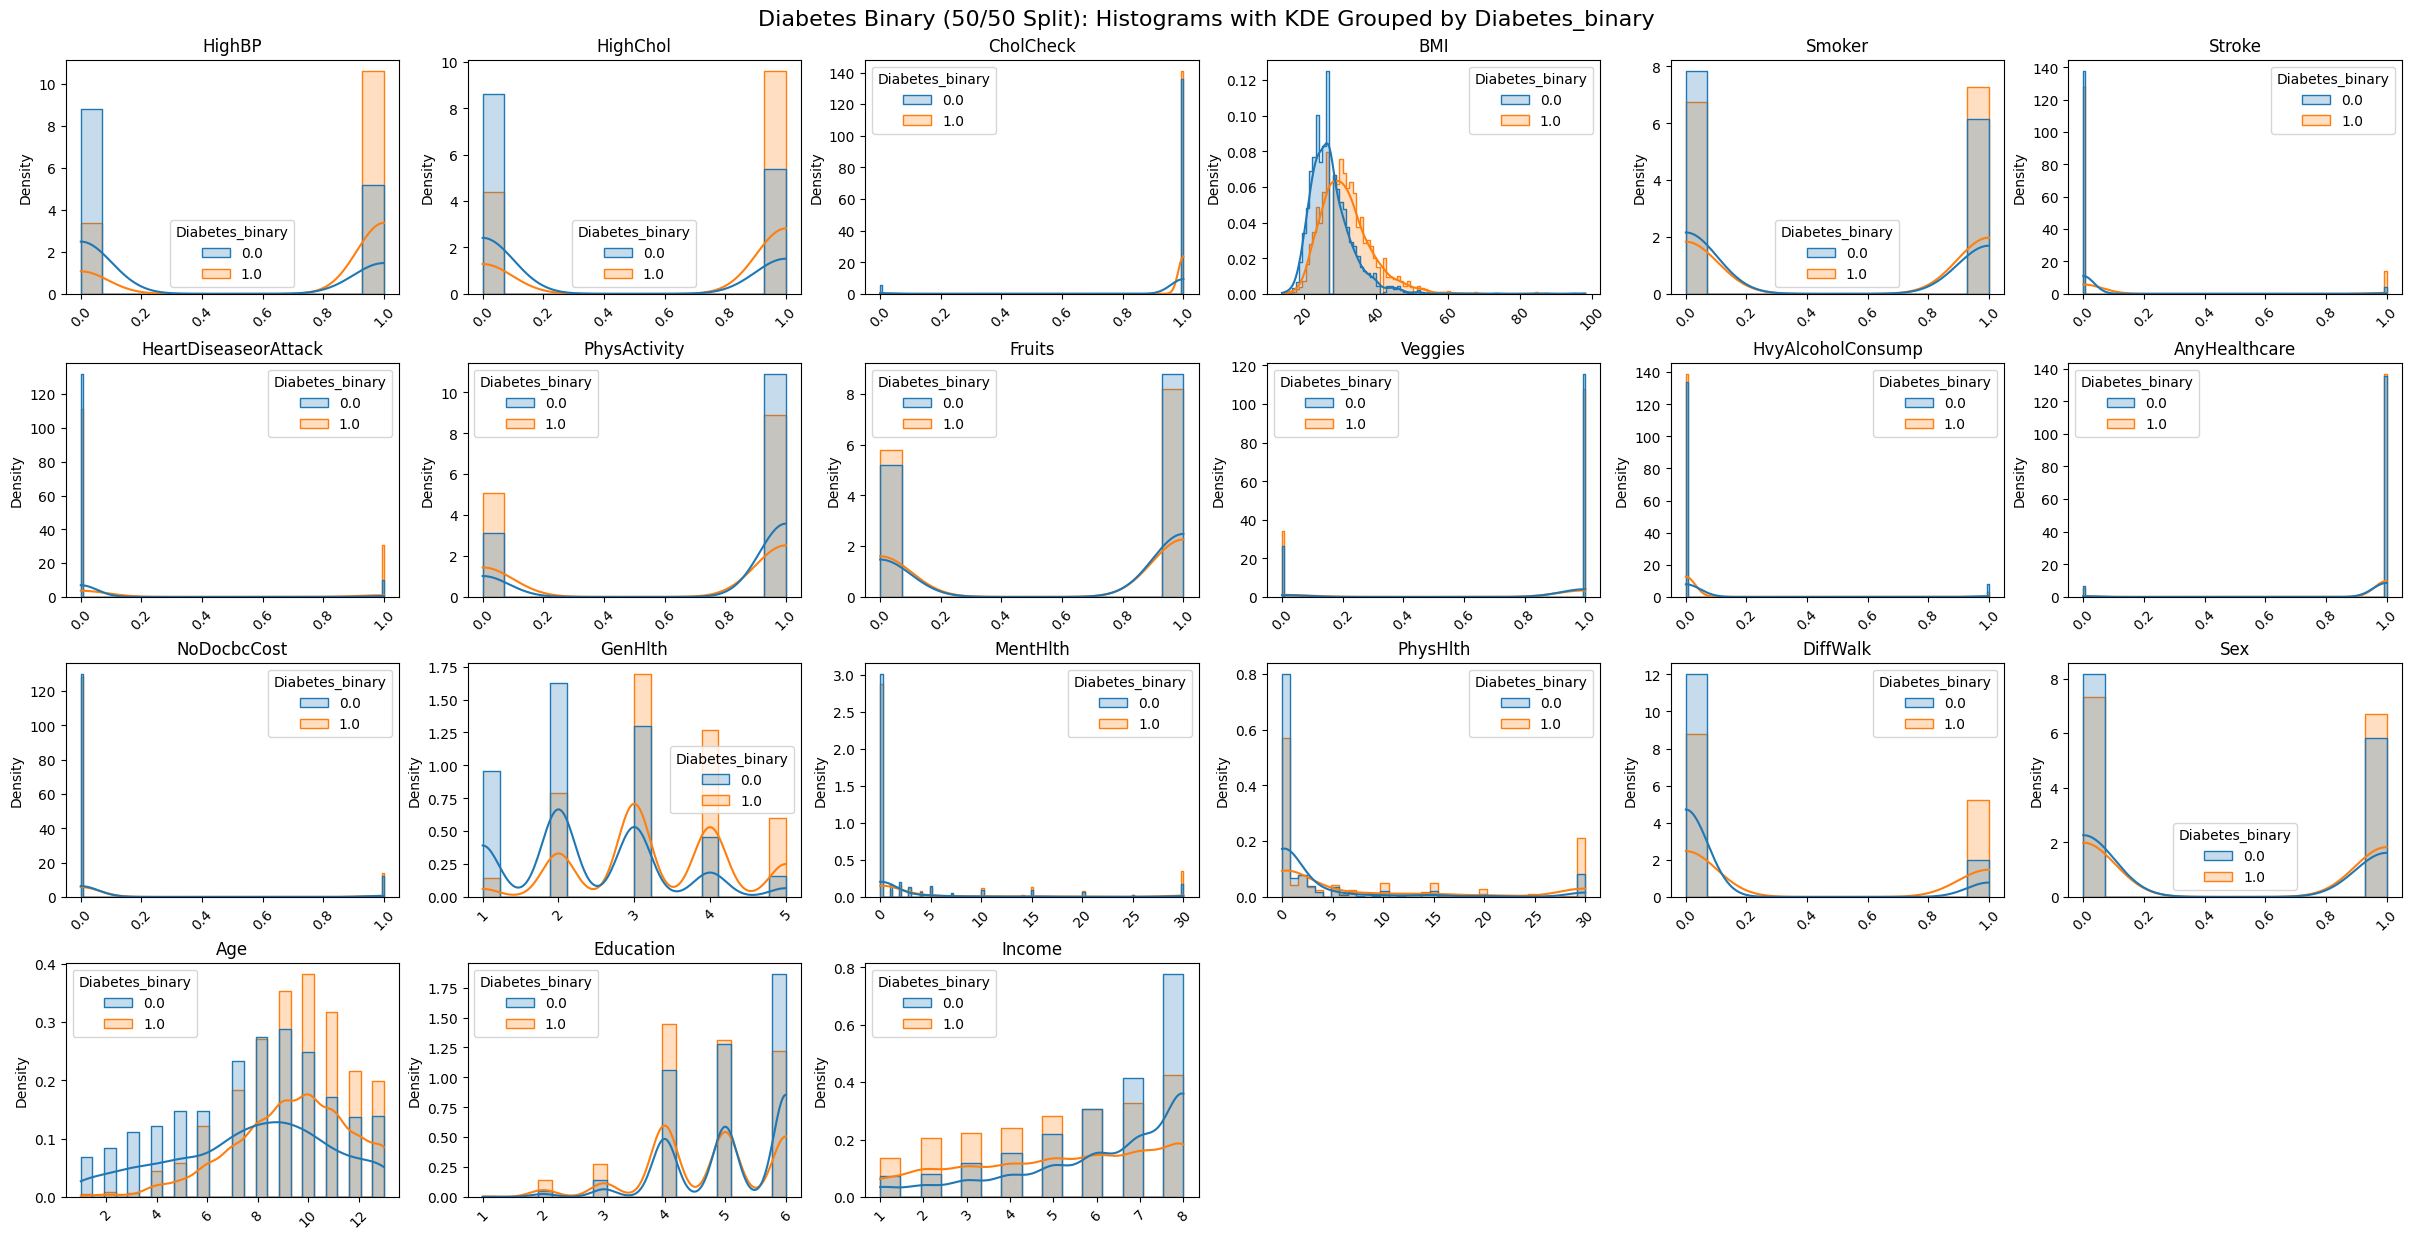

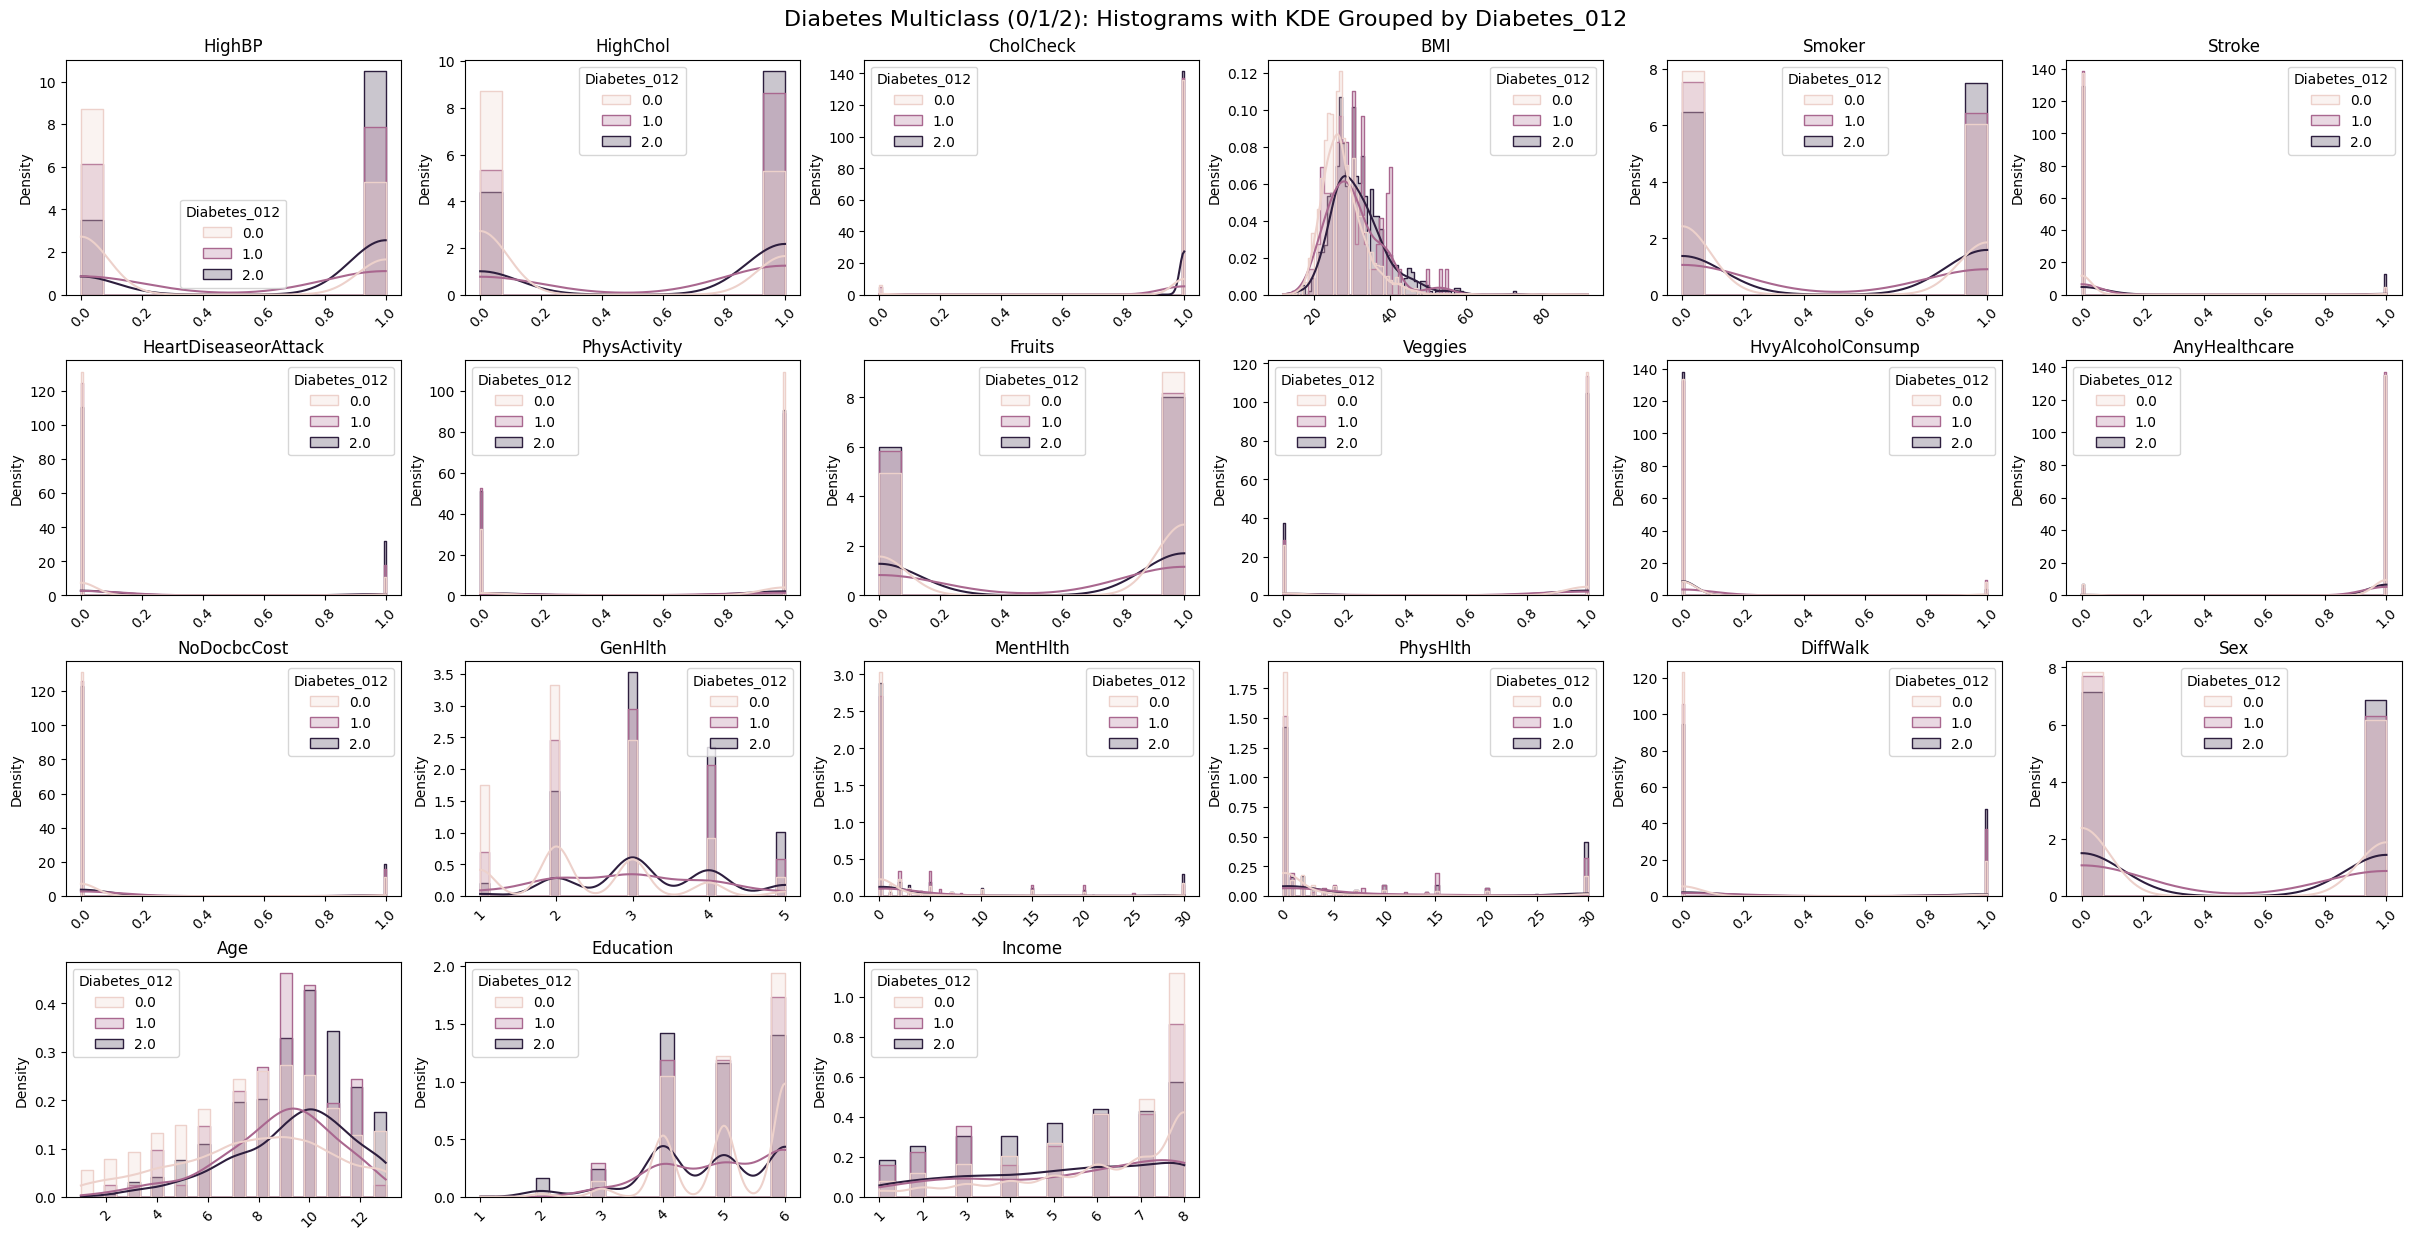

In [62]:
# === Load the data ===
df1 = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df2 = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df3 = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

# === Sample for performance ===
df1_sample = df1.sample(n=5000, random_state=42)
df2_sample = df2.sample(n=5000, random_state=42)
df3_sample = df3.sample(n=5000, random_state=42)

# === Define datasets ===
datasets = [
    {"df": df1_sample, "target": "Diabetes_binary", "name": "Diabetes Binary (Original)"},
    {"df": df2_sample, "target": "Diabetes_binary", "name": "Diabetes Binary (50/50 Split)"},
    {"df": df3_sample, "target": "Diabetes_012",     "name": "Diabetes Multiclass (0/1/2)"}
]

# === Loop through each dataset ===
for data in datasets:
    df = data["df"]
    target = data["target"]
    name = data["name"]
    
    # 1) Select numeric cols (drop target)
    numeric_cols = [c for c in df.select_dtypes(include="number").columns if c != target]

    # 2) Grid layout
    plots_per_row = 6
    total = len(numeric_cols)
    rows  = (total + plots_per_row - 1) // plots_per_row  
    fig, axes = plt.subplots(
        rows, plots_per_row,
        figsize=(plots_per_row * 4, rows * 3),
        constrained_layout=True
    )
    axes = axes.flatten()

    # 3) Plot histograms with KDE and hue=target
    for i, col in enumerate(numeric_cols):
        sns.histplot(
            data=df,
            x=col,
            hue=target,
            element="step",
            stat="density",
            common_norm=False,
            kde=True,
            kde_kws={"cut": 0},
            ax=axes[i]
        )
        axes[i].set_title(col)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Density")
        axes[i].tick_params(axis='x', rotation=45)

    # 4) Remove empty plots
    for ax in axes[total:]:
        fig.delaxes(ax)

    plt.suptitle(f"{name}: Histograms with KDE Grouped by {target}", y=1.02, fontsize=16)
    plt.show()

## Distribution Insights by Diabetes Diagnosis

To explore how feature distributions vary by diabetes status, I generated grouped histograms with KDE overlays for all three versions of the dataset:

- **Original Binary Dataset** (`0 = No Diabetes, 1 = Diabetes`)
- **50/50 Balanced Binary Dataset**
- **Multiclass Dataset** (`0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes`)

Although all three datasets contain the same underlying individuals, each format highlights different insights depending on how the target variable is structured.

### Original Binary Dataset

In the original dataset, clear distribution differences emerge between diabetic and non-diabetic individuals. For example:

- **BMI** tends to be higher and more right-skewed among diabetic cases.
- **General health**, **physical health**, and **mental health** self-ratings all shift negatively in the diabetic group, indicating poorer well-being.
- **Comorbid conditions** like high blood pressure, high cholesterol, history of stroke, and heart disease are noticeably more prevalent in the diabetic population.

While behavioral variables like **smoking**, **alcohol use**, and **physical activity** show minimal separation, this may be due to the coarse binary encoding masking finer behavioral variation.

### 50/50 Balanced Binary Dataset

The KDE shapes remain virtually identical to the original binary dataset, as expected, since the features are unchanged. However, balancing the classes equalizes the height of the curves and removes the visual dominance of the majority class. This makes it easier to visually compare patterns across groups while preserving the relationships observed in the original data.

### Multiclass Dataset (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)

The multiclass format adds nuance by distinguishing between prediabetes and diabetes:

- **BMI**, **general health**, and **mental/physical health** show progressive worsening from group 0 to 2.
- Conditions like **high blood pressure**, **high cholesterol**, and **heart disease** also follow a stepped pattern, worsening as diabetes status advances.
- This progression suggests that some health metrics degrade before a full diabetes diagnosis, offering valuable signals for early risk detection.

By splitting the population into three stages, the multiclass structure reveals trends not visible in the binary formats, strengthening its utility for understanding disease progression.



 Original Binary — diabetes_binary_health_indicators_BRFSS2015.csv


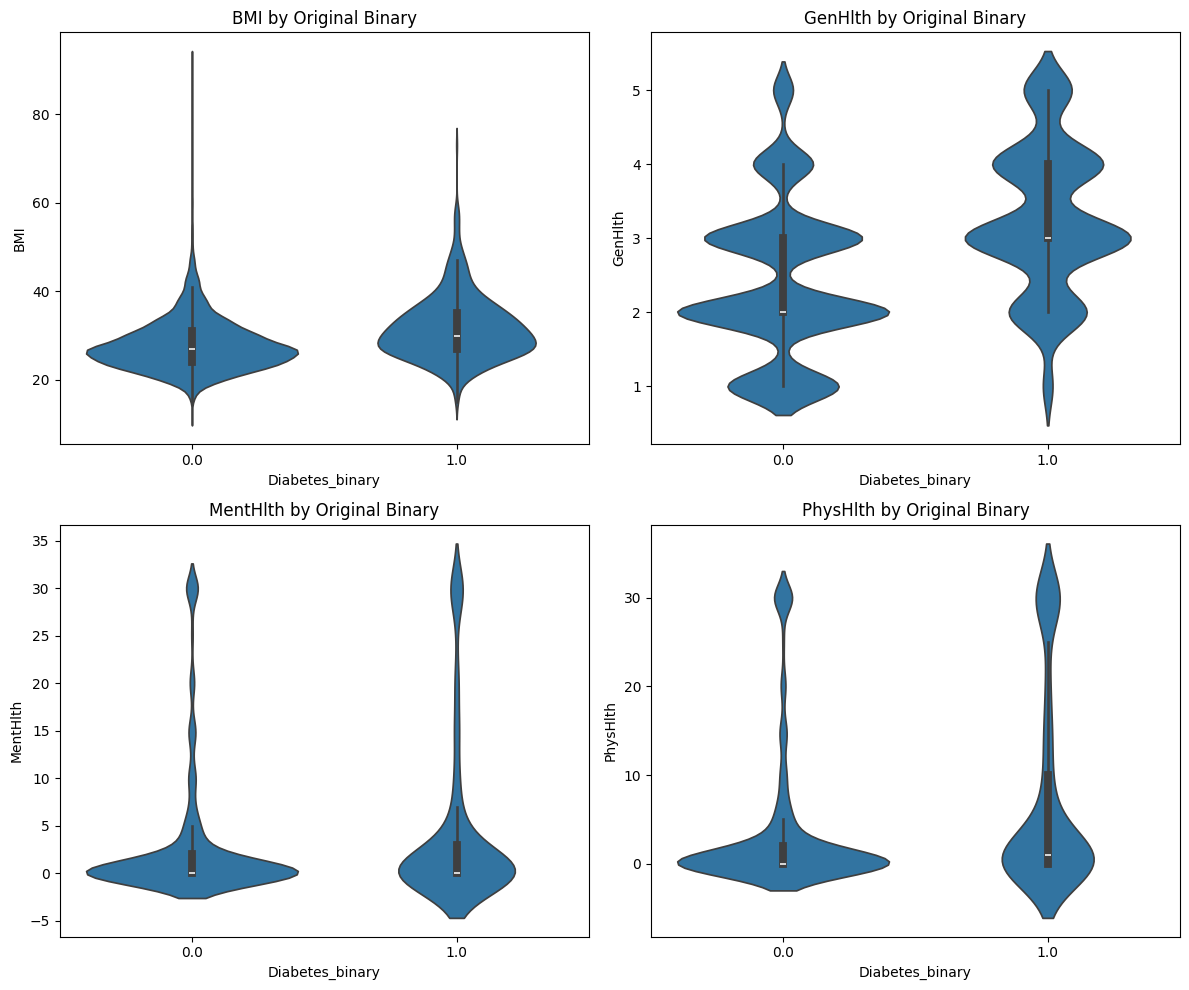


 Balanced 50/50 — diabetes_binary_5050split_health_indicators_BRFSS2015.csv


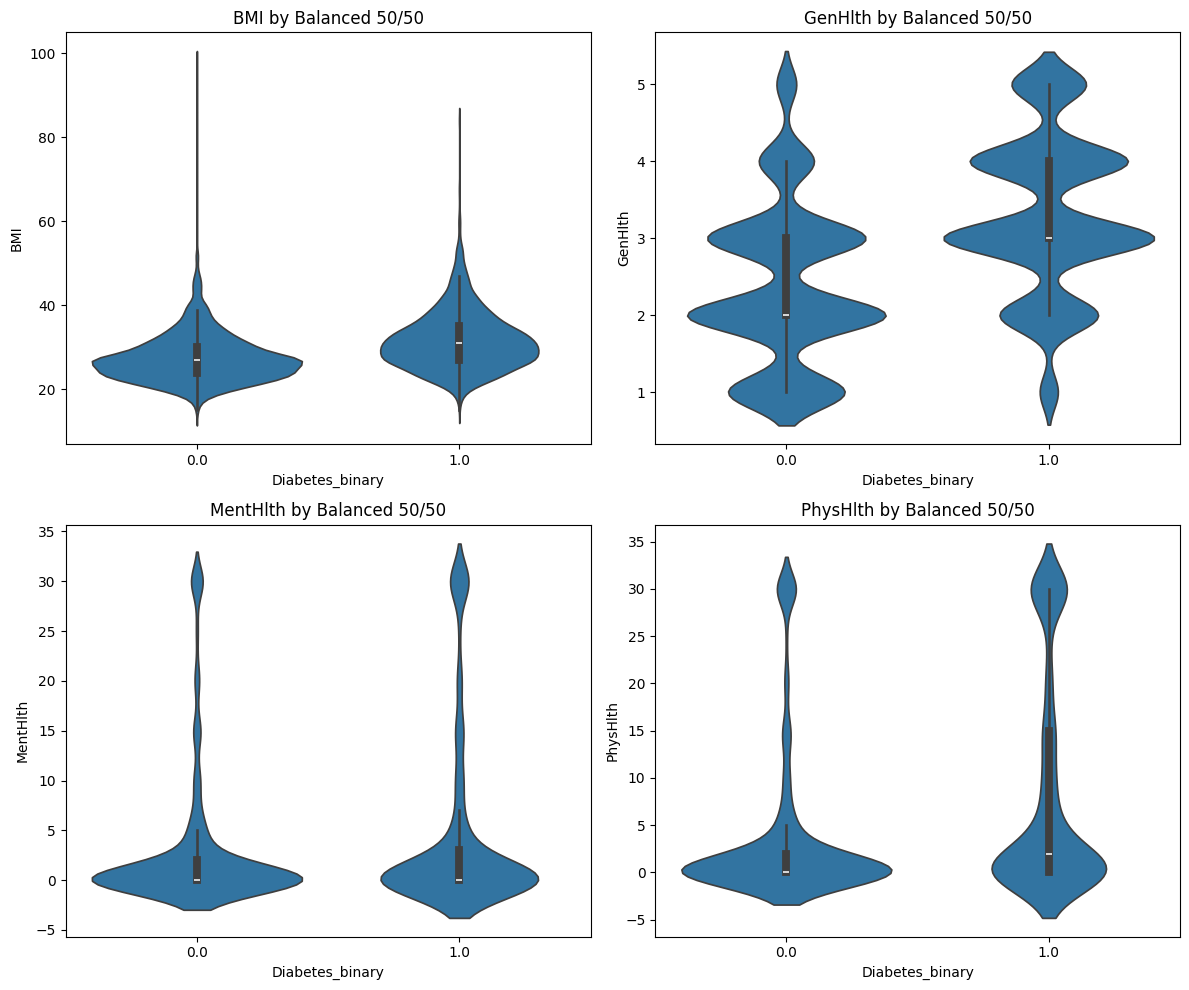


 Multiclass 0/1/2 — diabetes_012_health_indicators_BRFSS2015.csv


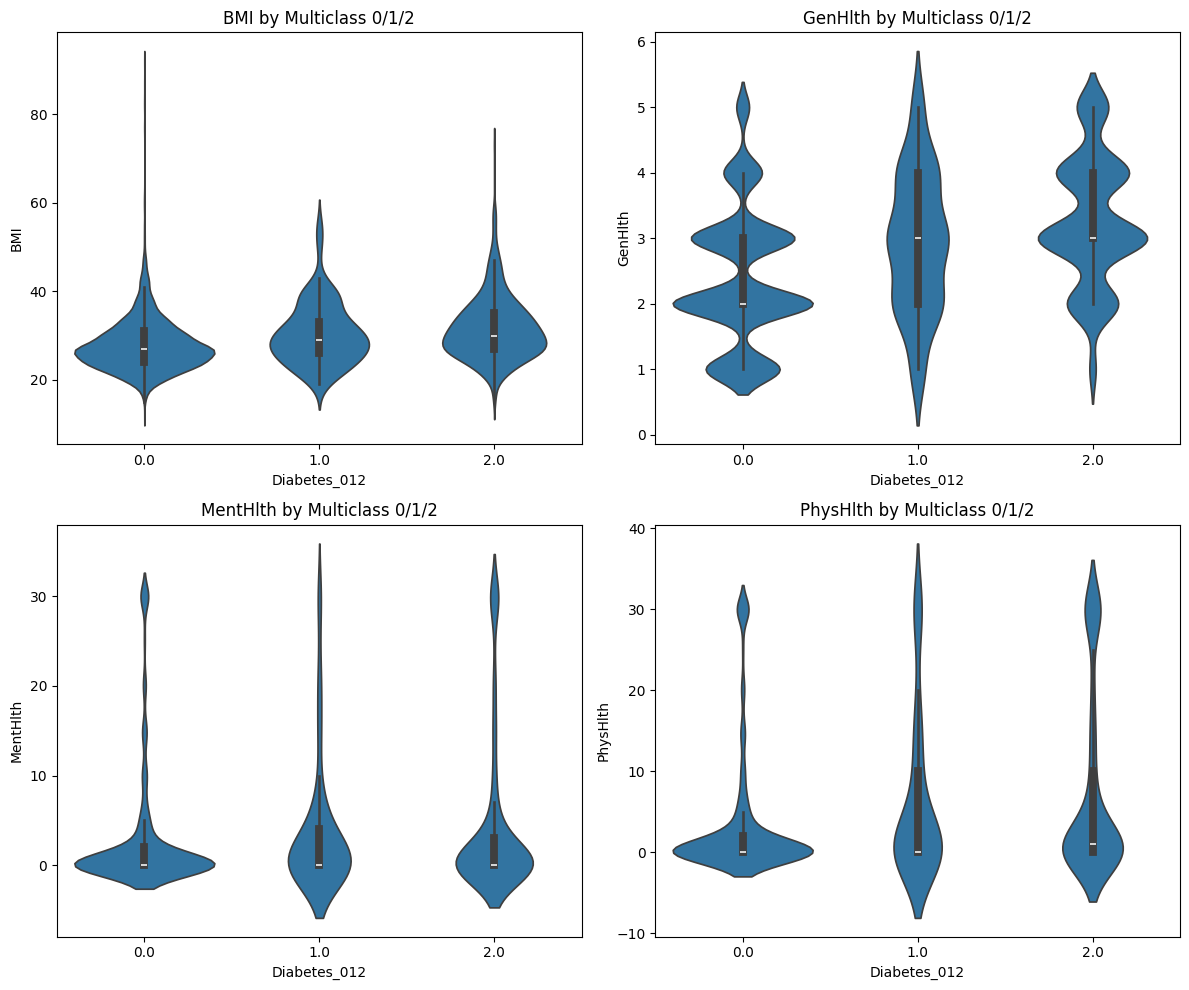

In [63]:
# Define dataset paths and target columns
datasets = [
    ("diabetes_binary_health_indicators_BRFSS2015.csv", "Diabetes_binary", "Original Binary"),
    ("diabetes_binary_5050split_health_indicators_BRFSS2015.csv", "Diabetes_binary", "Balanced 50/50"),
    ("diabetes_012_health_indicators_BRFSS2015.csv", "Diabetes_012", "Multiclass 0/1/2")
]

# Features to visualize
features_to_plot = ["BMI", "GenHlth", "MentHlth", "PhysHlth"]

# Plot violin plots for each dataset
for file, target, label in datasets:
    print(f"\n {label} — {file}")
    
    # Load sample to manage memory
    df = pd.read_csv(file).sample(n=5000, random_state=42)
    
    num_cols = 2
    num_rows = (len(features_to_plot) + 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
    axes = axes.flatten()
    
    for i, feature in enumerate(features_to_plot):
        sns.violinplot(data=df, x=target, y=feature, ax=axes[i])
        axes[i].set_title(f"{feature} by {label}")
        axes[i].set_xlabel(f"{target}")
        axes[i].set_ylabel(feature)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


## Violin Plot Highlights from All Three Diabetes Datasets

I used violin plots to explore how BMI, general health, physical health days, and mental health days vary across diabetes statuses in each dataset. Here's what stood out in each one:

### Original Binary Dataset

In this version, people with diabetes clearly had higher BMI and worse general health. Physical health days were also higher for diabetic individuals. Mental health days showed more variability, but the difference wasn't as sharp. Overall, the shapes looked natural and had enough spread to feel like real-world responses.

### Balanced 50/50 Dataset

Even though the target classes were balanced, the pattern was very similar. Diabetic individuals still showed higher BMI and poorer health scores. The nice thing here is that the separation between groups remained consistent, which suggests the trends are strong. The distributions still looked natural with expected variation.

### Multiclass Dataset (0 = no diabetes, 1 = prediabetes, 2 = diabetes)

This one showed the clearest progression. BMI, poor general health, and number of bad physical health days all increased steadily from group 0 to group 2. Mental health also trended upward slightly. These shapes looked believable and gave the strongest insight into how health worsens as diabetes develops. It was nice to see that the middle group (prediabetes) actually had intermediate values, which makes the dataset feel natural and useful for modeling risk progression.

### Overall Thoughts

All three datasets showed realistic patterns, and the distributions had enough variation to seem trustworthy. The multiclass version gave the most nuanced insight, so I’ll likely focus on that moving forward.


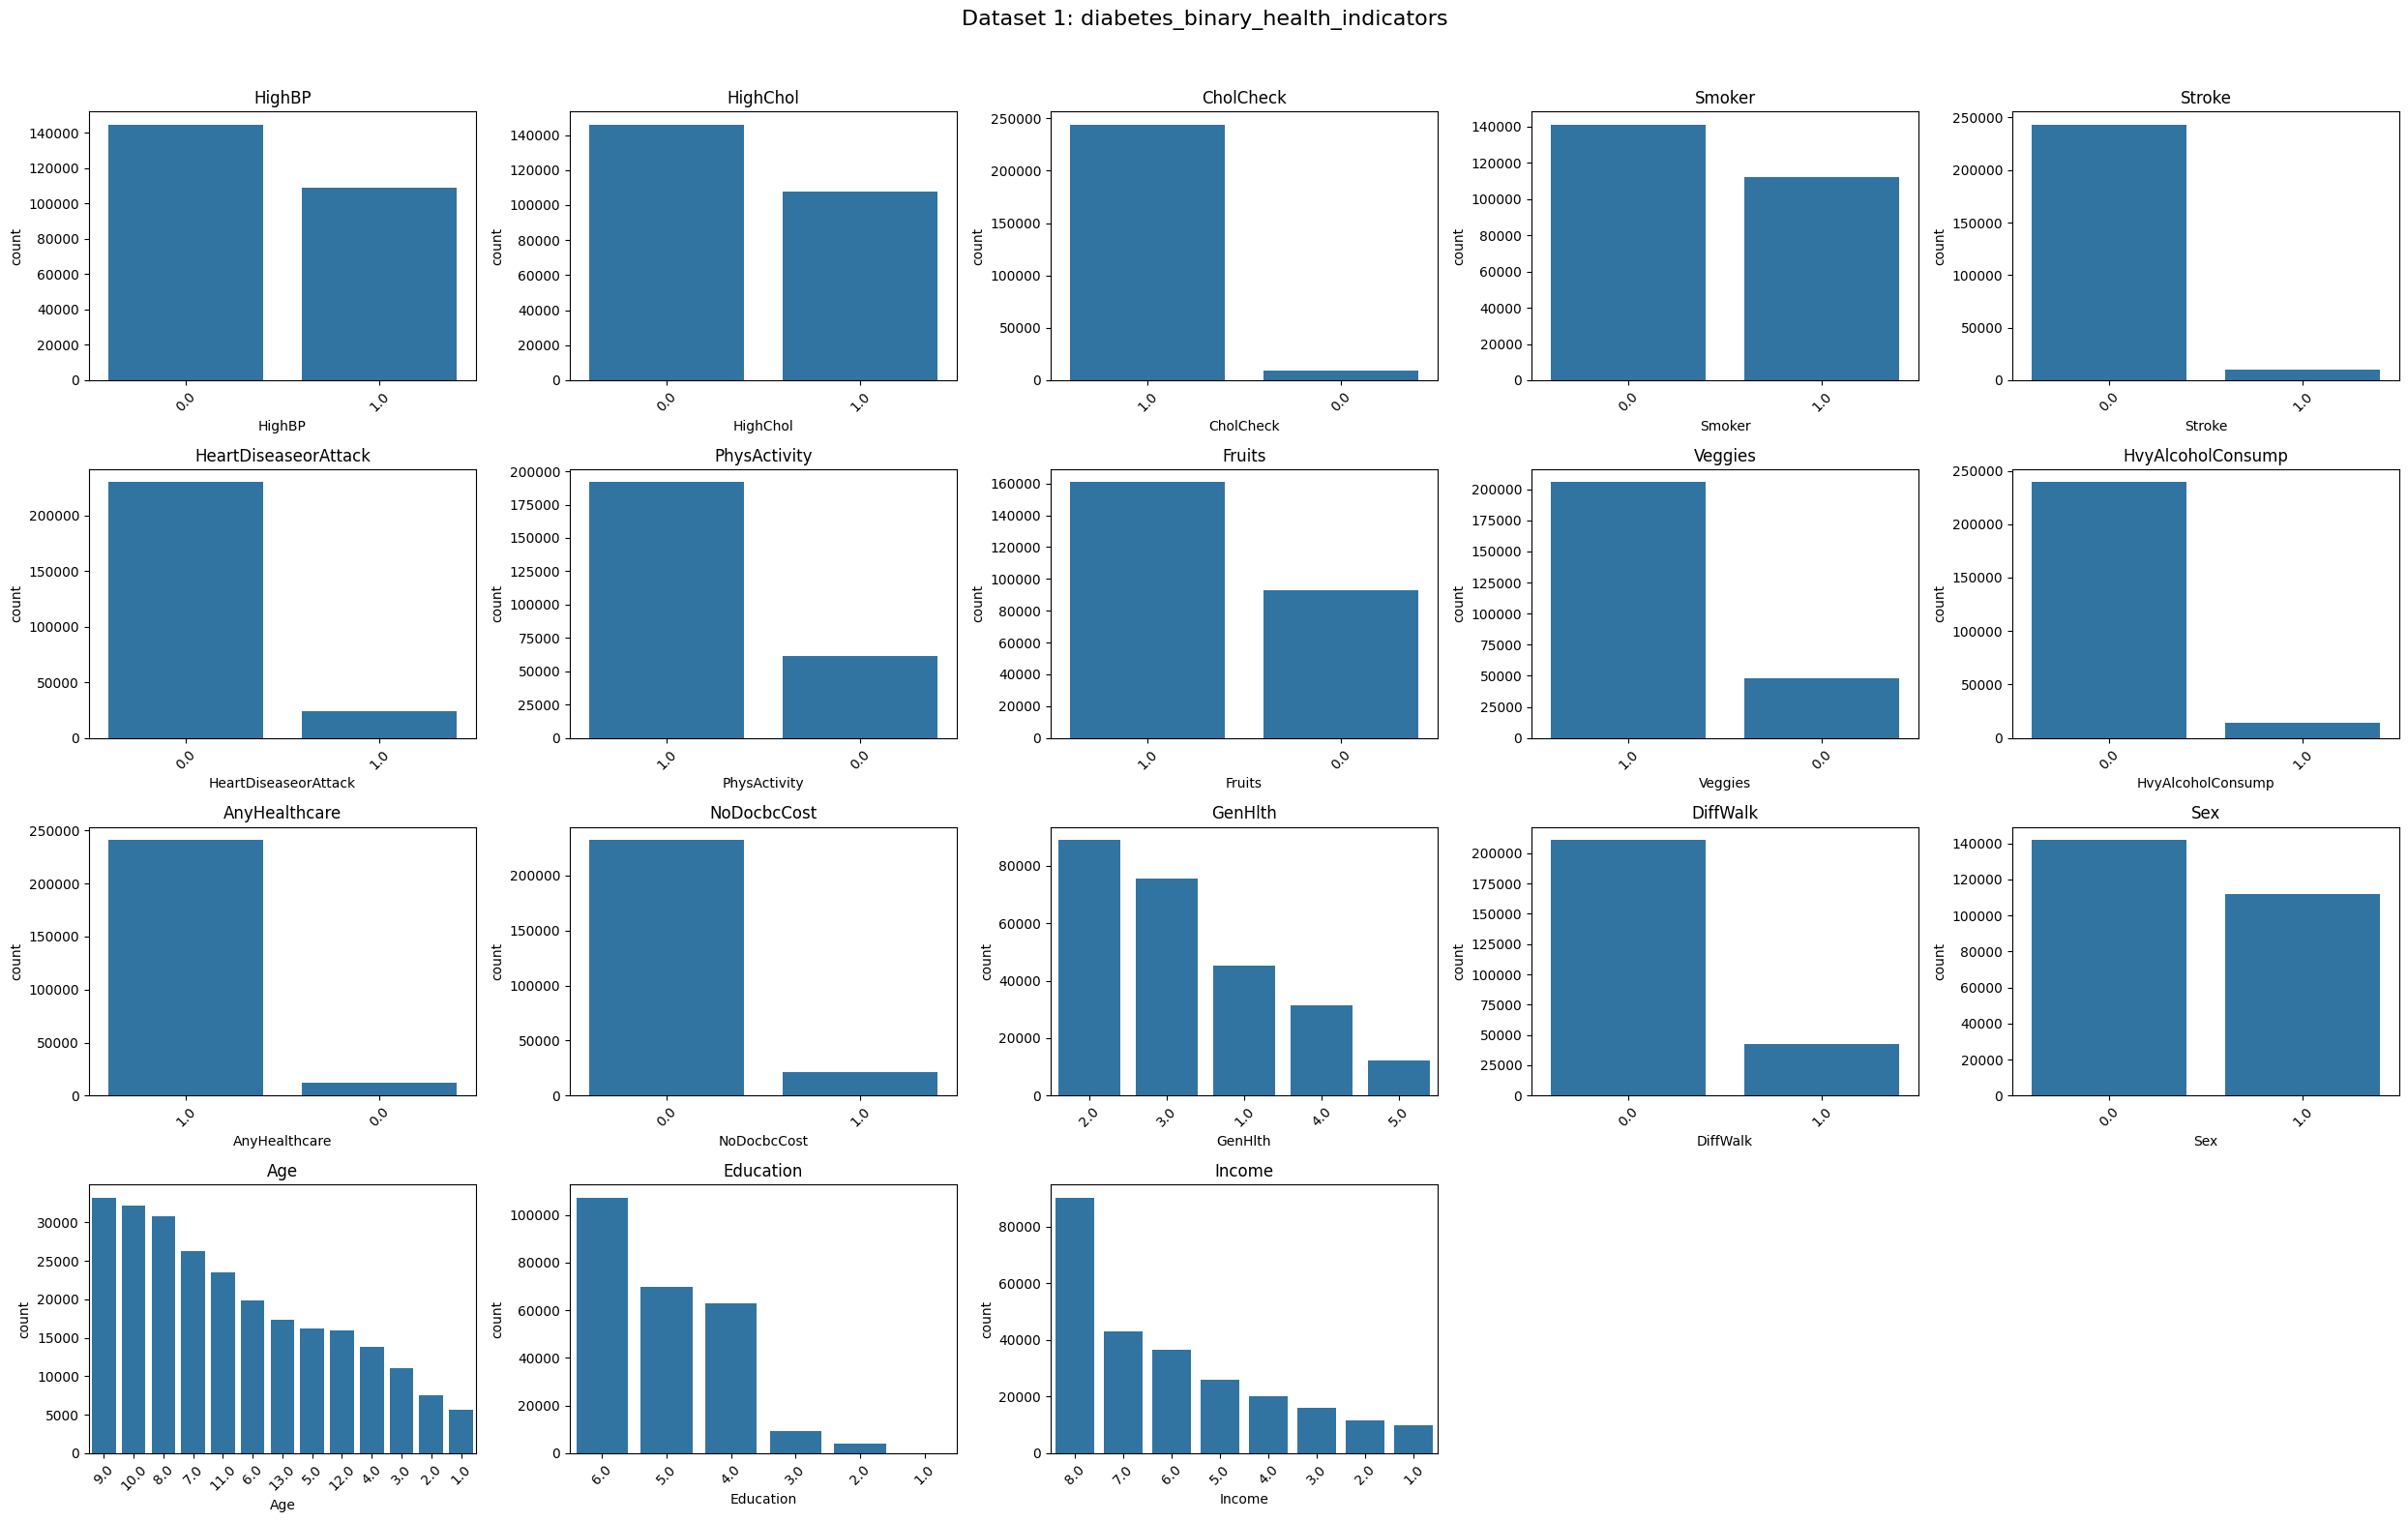

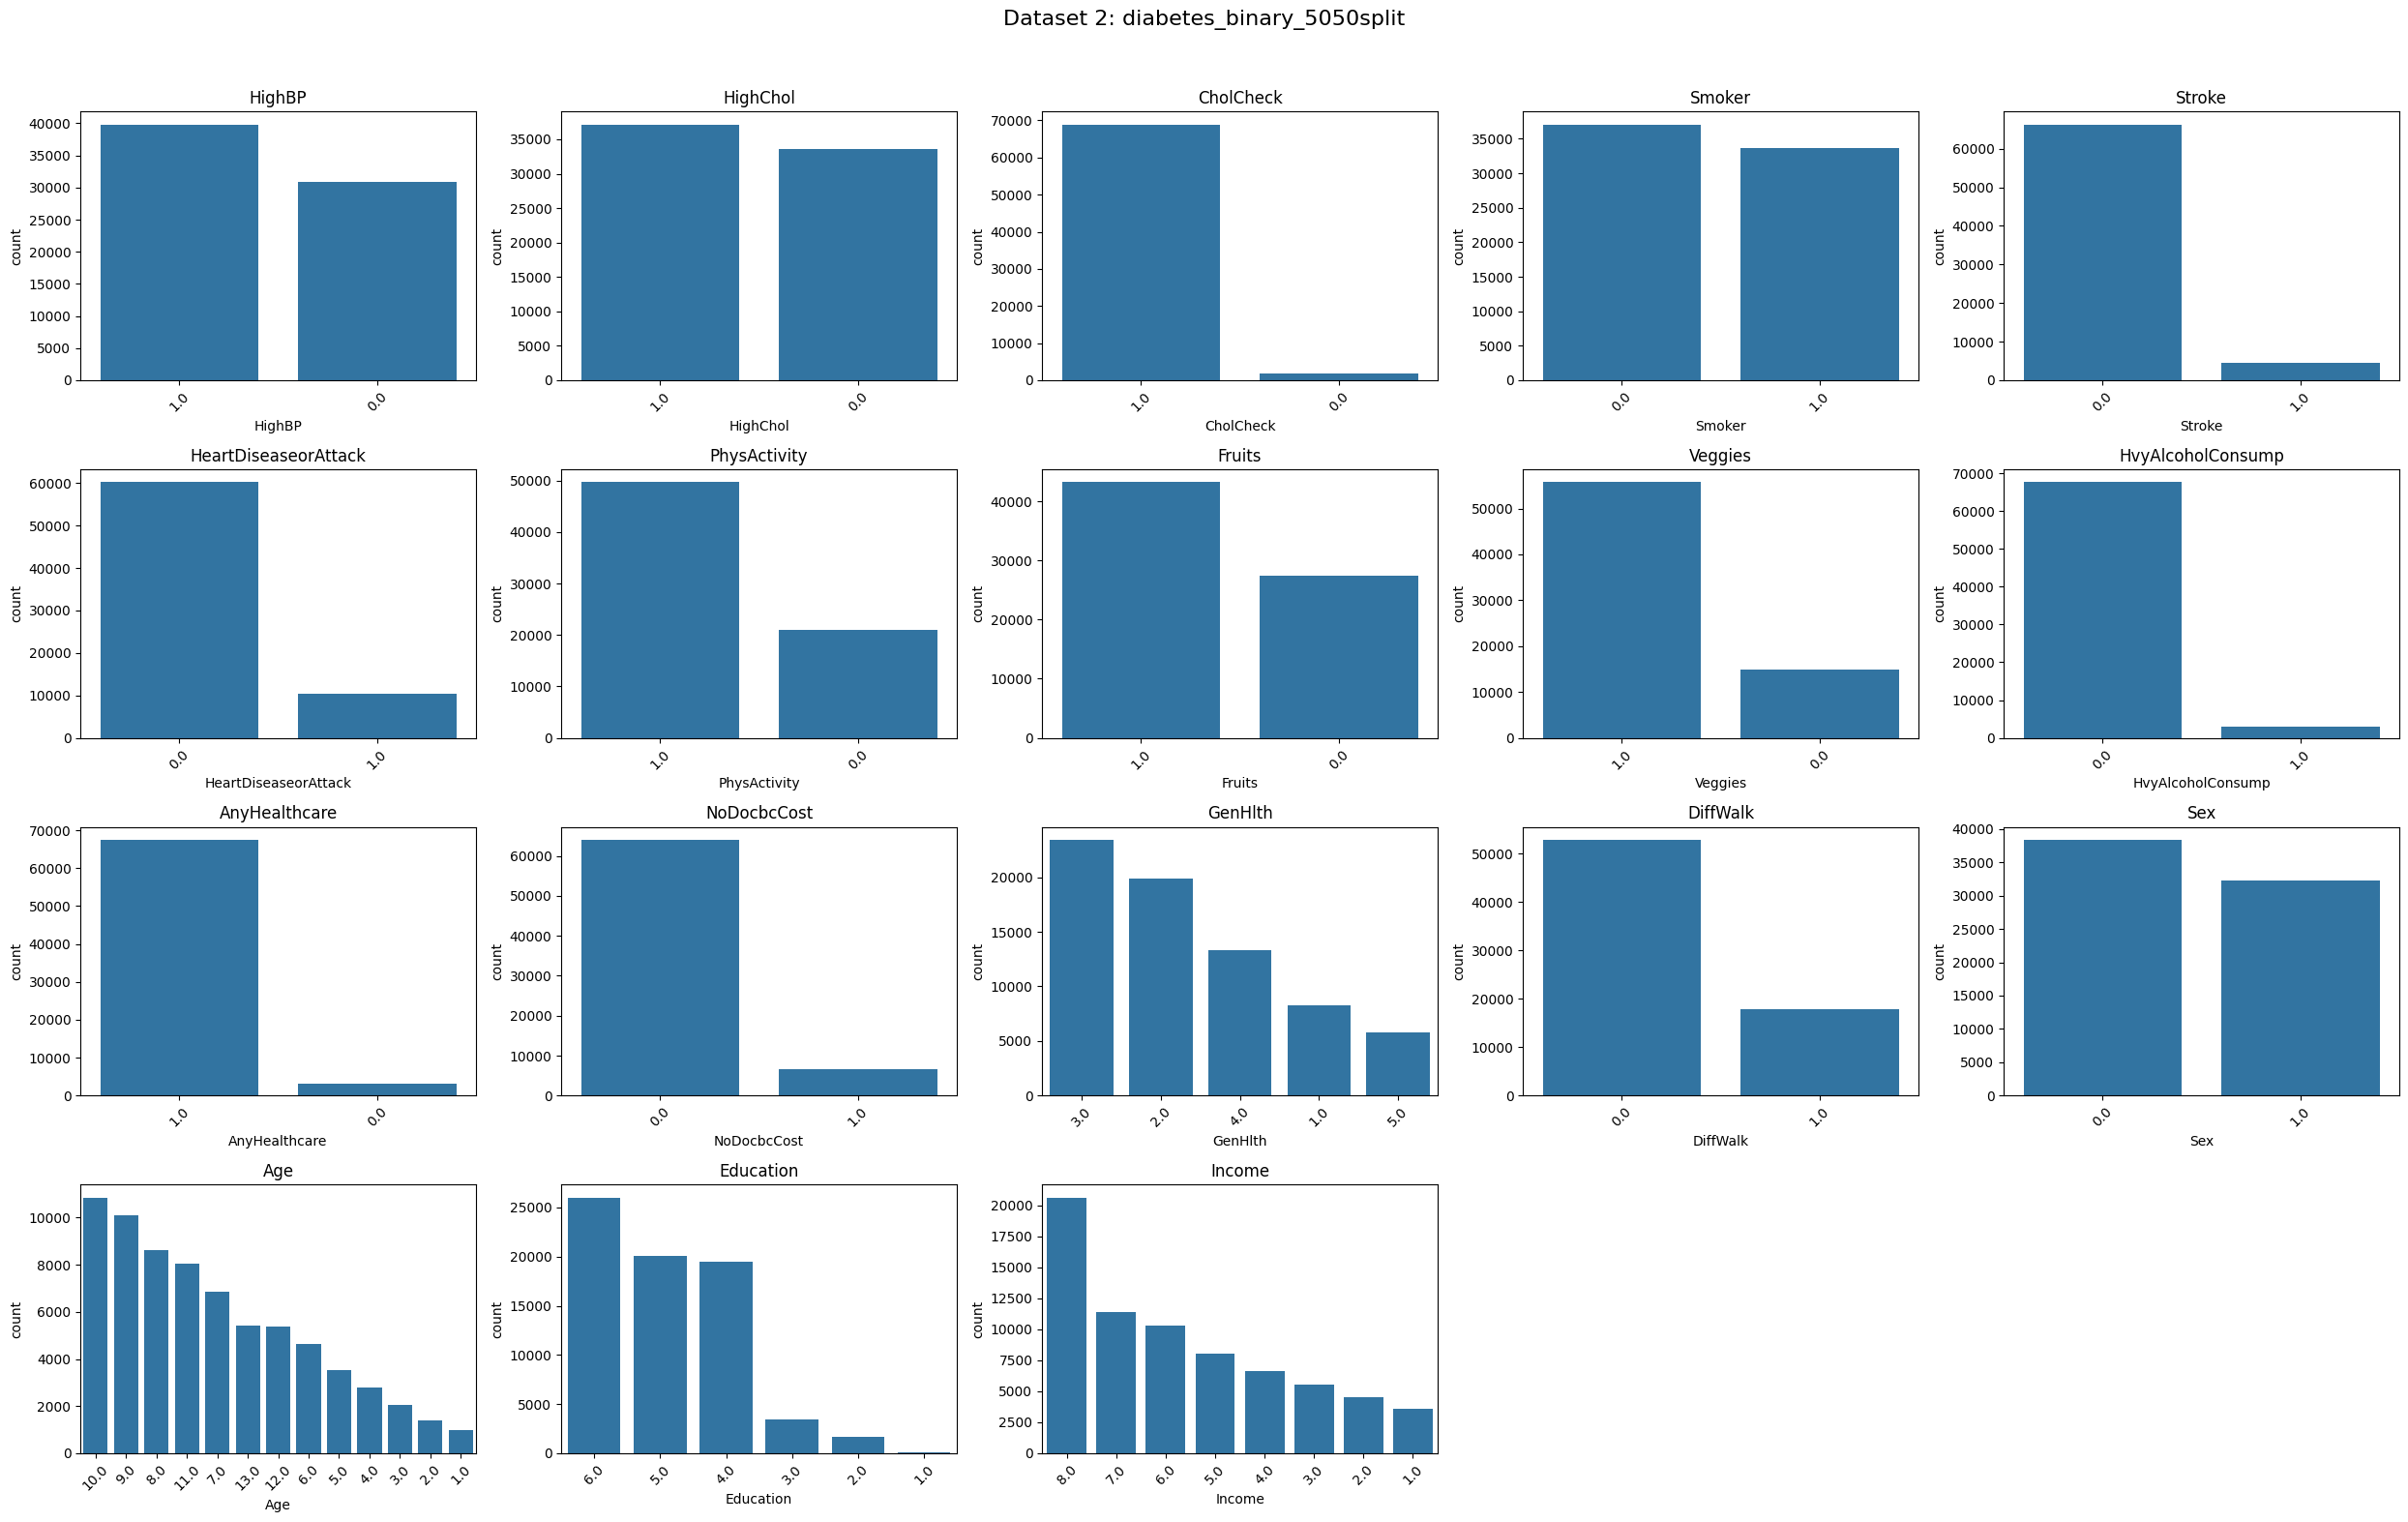

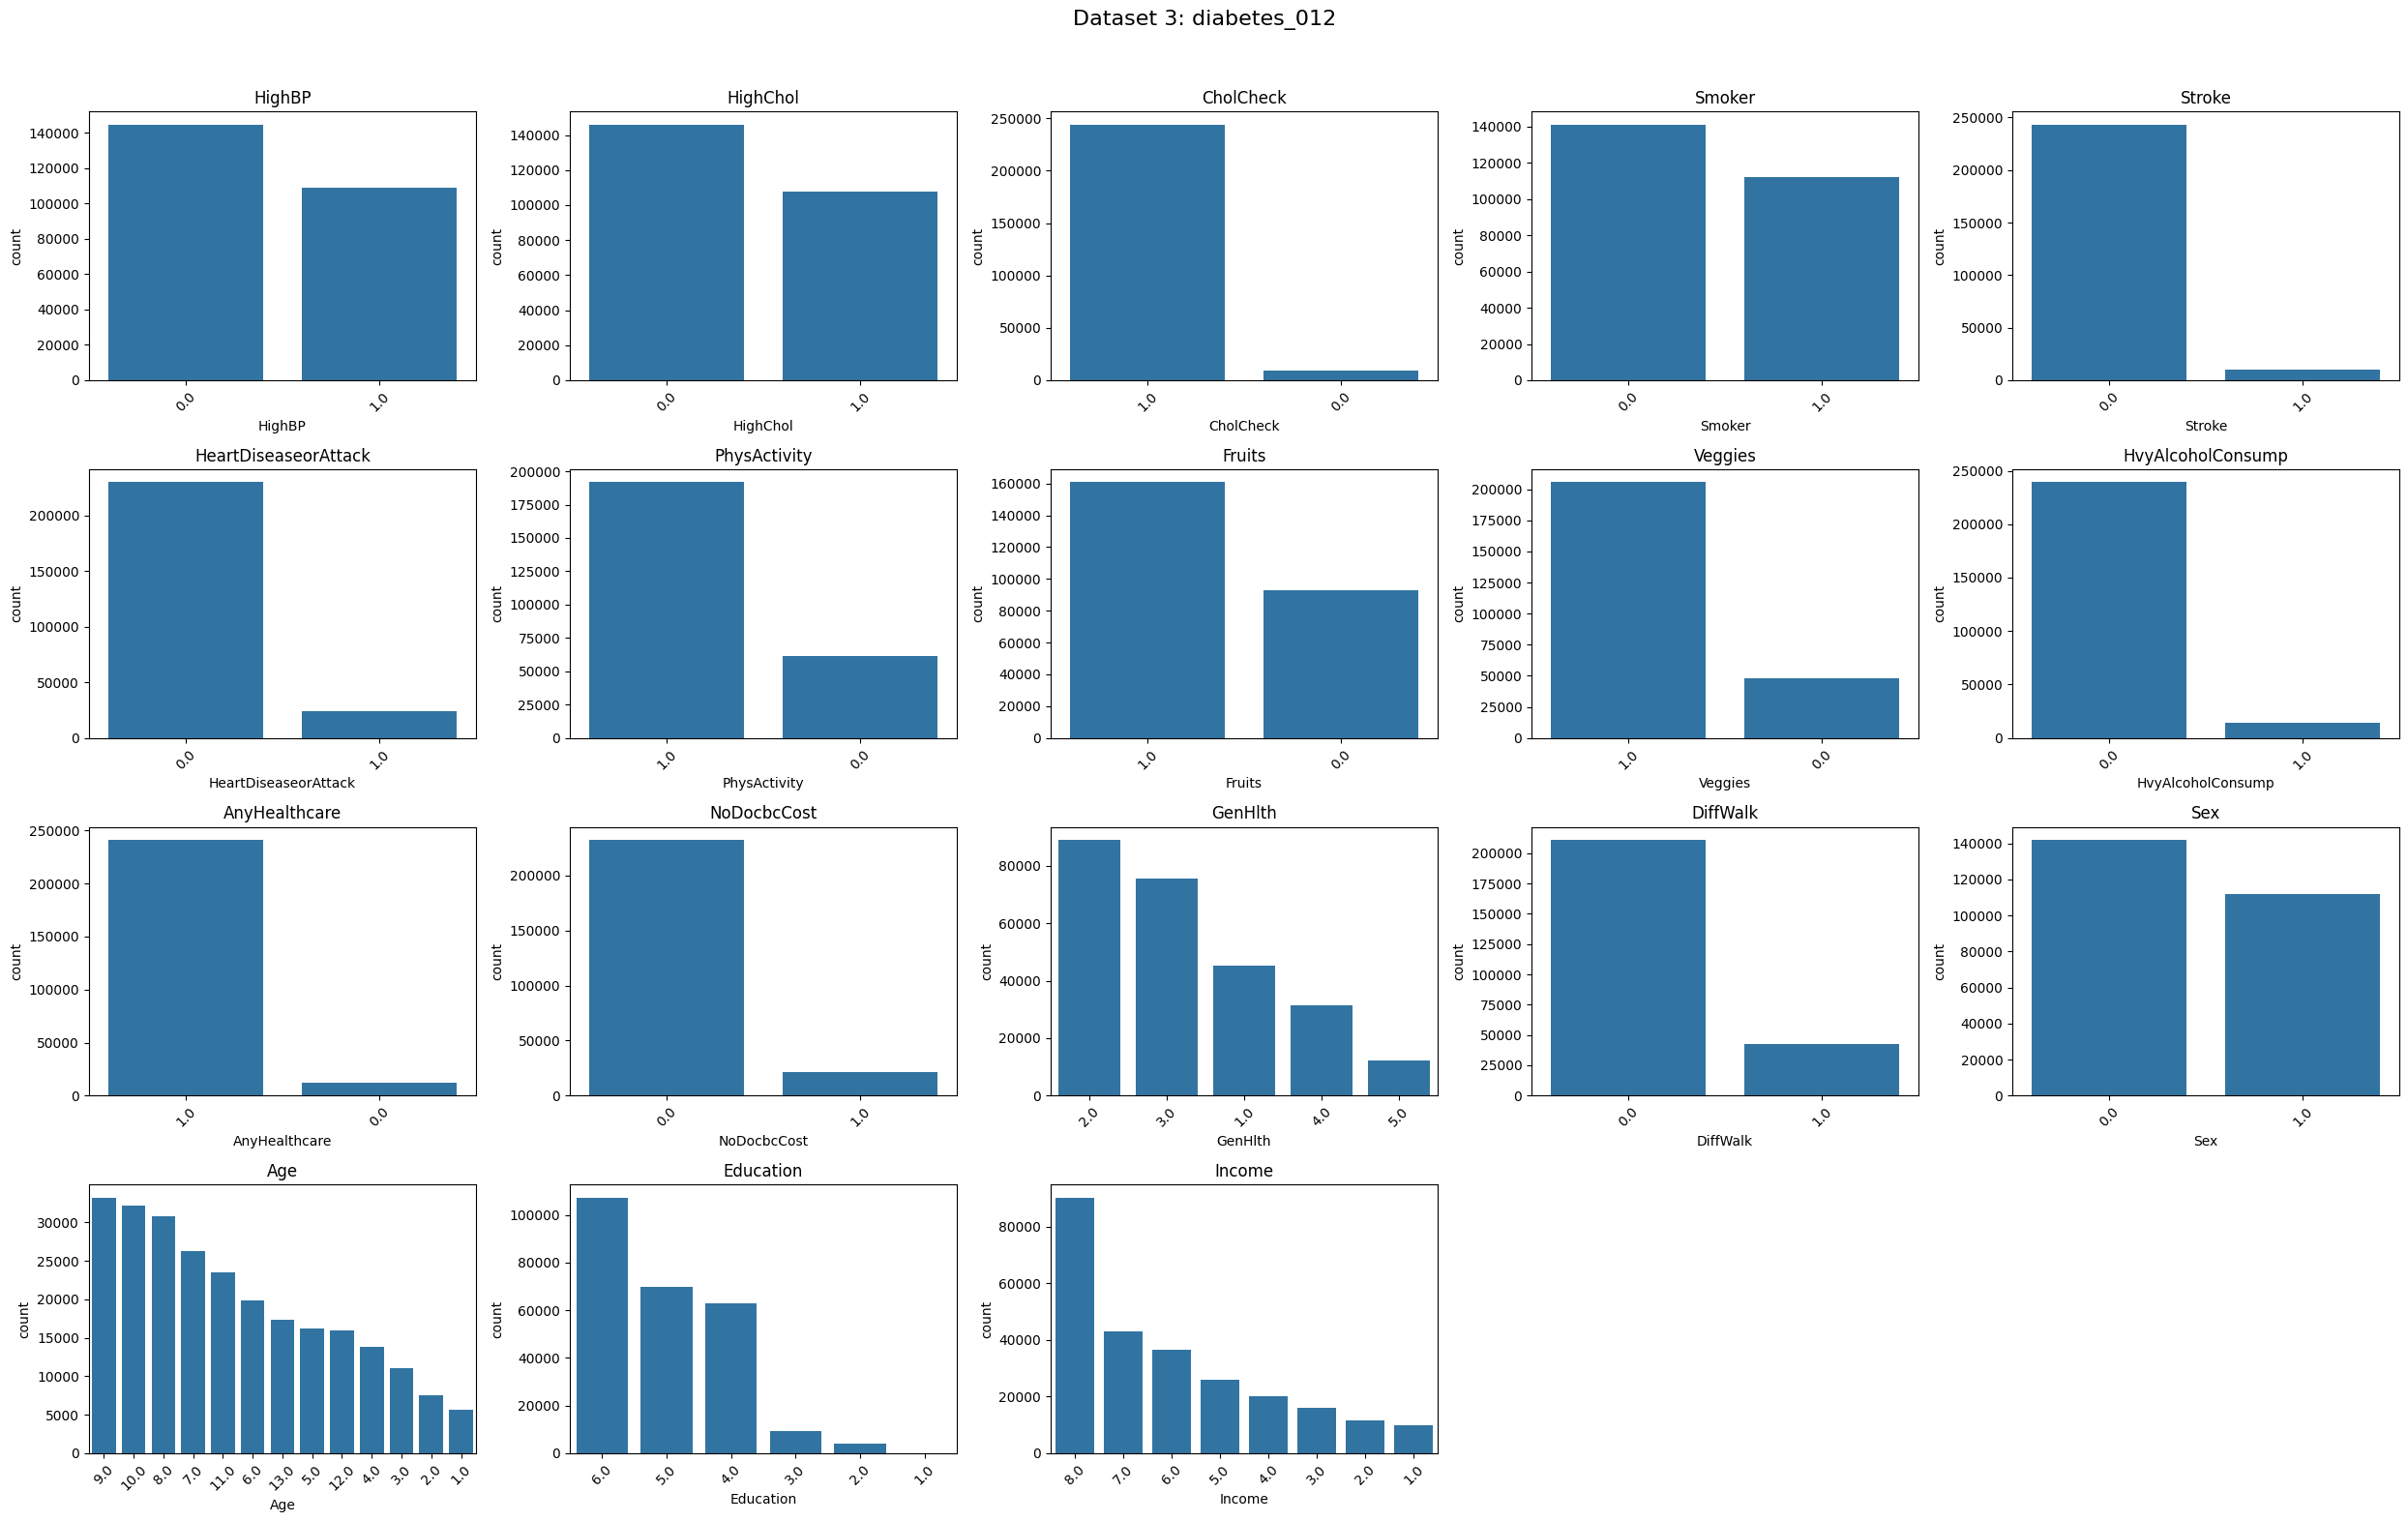

In [64]:
# binary/categorical columns 
cat_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
    'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]

# Plotting function
def plot_categorical_counts(df, cat_cols, title):
    plots_per_row = 5
    rows = math.ceil(len(cat_cols) / plots_per_row)
    fig, axes = plt.subplots(rows, plots_per_row, figsize=(plots_per_row * 5, rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        if col in df.columns:
            sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
            axes[i].set_title(col)
            axes[i].tick_params(axis='x', rotation=45)
        else:
            axes[i].set_visible(False)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot for each dataset
plot_categorical_counts(df1, cat_cols, "Dataset 1: diabetes_binary_health_indicators")
plot_categorical_counts(df2, cat_cols, "Dataset 2: diabetes_binary_5050split")
plot_categorical_counts(df3, cat_cols, "Dataset 3: diabetes_012")

## Categorical Variable Patterns Across the 3 Diabetes Datasets

This is great to see after the last hypertension dataset. There is finally some variability, and the distributions are revealing. I looked at 18 categorical and ordinal variables across all three diabetes datasets: the original binary version, the balanced 50/50 version, and the multiclass 0/1/2 version. Here is what stood out to me.

### Dataset 1: diabetes_binary_health_indicators

High blood pressure and high cholesterol were very common. High blood pressure showed up in more than half the sample. Cholesterol checks were almost universal, which is a good sign that routine screening is happening. Smoking was reported by a large portion of the sample. Stroke and heart disease or heart attack were less common but still visible in the dataset.

Physical activity, fruit, and vegetable consumption were all lacking. The majority of the population did not meet these basic health behavior indicators. Heavy alcohol use was rare, but not nonexistent. Most people had access to some form of healthcare, but there were still many who reported being unable to see a doctor due to cost.

The general health ratings showed that many people rated their health as average to poor. Difficulty walking was not widespread but still present. Education and income levels were skewed toward the lower end, which is important context for interpreting the health behaviors and outcomes above.

### Dataset 2: diabetes_binary_5050split

This version of the dataset was balanced by outcome, so I expected more even distributions across other variables. That mostly held true. The proportions for high blood pressure, cholesterol, and smoking were still high, but less extreme. Cholesterol checks and healthcare access remained high, similar to dataset 1.

Diet and physical activity indicators remained poor even after balancing. This suggests that these behaviors are problematic across the full population, not just among people with diabetes. Stroke, heart disease, and difficulty walking were easier to compare in this version of the dataset. Lower education and income levels still dominated.

### Dataset 3: diabetes_012

This was the most informative dataset because it included no diabetes, prediabetes, and diabetes cases. High blood pressure and high cholesterol followed the expected trend: more common in people with full diabetes. Cholesterol checks were still near-universal, so access to basic screening doesn’t seem to be the problem.

Smoking didn’t vary as much across groups as I expected. Heart disease and stroke increased clearly with diabetes severity. Diet and activity patterns again showed that people with diabetes were less likely to meet health behavior goals.

General health, physical health, mental health days, and difficulty walking were more informative here. People with diabetes consistently reported more health issues across these measures. Income and education levels remained skewed toward lower categories regardless of diabetes status.

### Key Takeaways

Across all datasets, I saw consistent evidence of high rates of metabolic risk factors like high blood pressure and cholesterol. Lifestyle factors like poor diet and physical inactivity were widespread. Healthcare access was generally high, but access alone did not translate to better outcomes.

Mental and physical health variables helped distinguish the diabetes categories in the multiclass dataset. These variables should be considered carefully in modeling or interpretation. Even in the balanced dataset, lifestyle risk factors were common, showing that they’re not just limited to people with diagnosed diabetes.

NoW lets check central tendencies 


In [65]:
def central_tendencies(df, name):
    print(f"\n=== Central Tendencies and Skewness for {name} ===")
    numeric_cols = df.select_dtypes(include='number').columns
    summary_stats = pd.DataFrame({
        'Mean': df[numeric_cols].mean(),
        'Median': df[numeric_cols].median(),
        'Mode': df[numeric_cols].mode().iloc[0],
        'Skewness': df[numeric_cols].skew()
    })
    print(summary_stats)

central_tendencies(df1, "Dataset 1: diabetes_binary")
central_tendencies(df2, "Dataset 2: diabetes_binary_5050split")
central_tendencies(df3, "Dataset 3: diabetes_012")



=== Central Tendencies and Skewness for Dataset 1: diabetes_binary ===
                           Mean  Median  Mode  Skewness
Diabetes_binary        0.139333     0.0   0.0  2.083024
HighBP                 0.429001     0.0   0.0  0.286904
HighChol               0.424121     0.0   0.0  0.307075
CholCheck              0.962670     1.0   1.0 -4.881271
BMI                   28.382364    27.0  27.0  2.122004
Smoker                 0.443169     0.0   0.0  0.228810
Stroke                 0.040571     0.0   0.0  4.657340
HeartDiseaseorAttack   0.094186     0.0   0.0  2.778742
PhysActivity           0.756544     1.0   1.0 -1.195546
Fruits                 0.634256     1.0   1.0 -0.557500
Veggies                0.811420     1.0   1.0 -1.592239
HvyAlcoholConsump      0.056197     0.0   0.0  3.854132
AnyHealthcare          0.951053     1.0   1.0 -4.181116
NoDocbcCost            0.084177     0.0   0.0  2.995290
GenHlth                2.511392     2.0   2.0  0.422867
MentHlth               3.184772 

## Central Tendencies and Skewness Summary: Diabetes Datasets
Across all three datasets:

- Most people are physically active, eat some fruits and veggies, and have access to healthcare.
- But a **small segment of the population reports extremely poor physical and mental health**, which creates a right-skewed distribution for those variables.
- The risk variables (Stroke, Heart Disease, Heavy Drinking) are rare across all three datasets, but their skew shows there’s still a meaningful minority dealing with these issues.
- Income and education keep showing up as slightly left-skewed, meaning more people fall into higher levels—which could affect modeling or fairness.

In [66]:
def detect_continuous_outliers(df, name):
    print(f"\n=== Outlier Detection (IQR Method) for {name} (continuous only) ===")
    # pick only numeric columns with more than 2 distinct values
    cont_cols = [c for c in df.select_dtypes(include='number').columns
                 if df[c].nunique() > 2]

    for col in cont_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # now count only genuine continuous outliers
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"{col}: {len(outliers)} outliers")

# apply to each dataset
detect_continuous_outliers(df1, "Dataset 1: diabetes_binary")
detect_continuous_outliers(df2, "Dataset 2: diabetes_binary_5050split")
detect_continuous_outliers(df3, "Dataset 3: diabetes_012")



=== Outlier Detection (IQR Method) for Dataset 1: diabetes_binary (continuous only) ===
BMI: 9847 outliers
GenHlth: 12081 outliers
MentHlth: 36208 outliers
PhysHlth: 40949 outliers
Age: 0 outliers
Education: 0 outliers
Income: 0 outliers

=== Outlier Detection (IQR Method) for Dataset 2: diabetes_binary_5050split (continuous only) ===
BMI: 2181 outliers
GenHlth: 0 outliers
MentHlth: 11816 outliers
PhysHlth: 10624 outliers
Age: 0 outliers
Education: 0 outliers
Income: 0 outliers

=== Outlier Detection (IQR Method) for Dataset 3: diabetes_012 (continuous only) ===
Diabetes_012: 39977 outliers
BMI: 9847 outliers
GenHlth: 12081 outliers
MentHlth: 36208 outliers
PhysHlth: 40949 outliers
Age: 0 outliers
Education: 0 outliers
Income: 0 outliers


## Outlier Detection Summary: IQR Method (Continuous Variables Only)

I ran the IQR method on each diabetes dataset, using only continuous variables with more than two unique values. Here's what stood out:

---

### Dataset 1: `diabetes_binary`
This dataset had a moderate number of outliers in a few key variables:

- **BMI** had a noticeable number of high-end outliers, which makes sense given the right skew I saw earlier.
- **MentHlth** and **PhysHlth** both had a lot of high outliers—again confirming that a small portion of people report extremely high numbers of bad days.
- **GenHlth** and **Age** had a few outliers but not excessive.
- The rest of the numeric variables were pretty clean.

---

### Dataset 2: `diabetes_binary_5050split`
Outlier patterns were similar to Dataset 1, but slightly more exaggerated:

- **BMI** had even more outliers than before, which fits since this dataset was balanced and included more people with diabetes.
- **MentHlth** and **PhysHlth** once again showed the most extreme upper-end outliers.
- The presence of outliers in **Age** and **GenHlth** was also more noticeable here.
- Most other continuous features stayed relatively clean.

---

### Dataset 3: `diabetes_012`
This dataset echoed the results of the first one:

- **BMI**, **MentHlth**, and **PhysHlth** were again the biggest sources of continuous outliers.
- The outlier count in **MentHlth** and **PhysHlth** was nearly identical to Dataset 1, suggesting strong overlap.
- Other numeric variables like **GenHlth**, **Age**, **Education**, and **Income** had some mild outliers but nothing too unexpected.

---

### What I’m Taking From This

Across all three datasets, the standout continuous outliers come from:

- **BMI** – likely due to a small group with obesity or underweight.
- **MentHlth** and **PhysHlth** – always skewed and prone to large values from a few individuals.
- Most other numeric variables are well-behaved with little to no outlier contamination.

This tells me I need to be careful if I’m modeling with BMI or the mental and physical health variables. I might consider transformations or trimming depending on how sensitive my models are.




=== Psychology Features Summary for Dataset 1: diabetes_binary ===

Central Tendencies:
               Mean  Median  Mode  Skewness
MentHlth   3.184772     0.0   0.0  2.721148
PhysHlth   4.242081     0.0   0.0  2.207395
DiffWalk   0.168224     0.0   0.0  1.773907
Smoker     0.443169     0.0   0.0  0.228810
Stroke     0.040571     0.0   0.0  4.657340
Education  5.050434     5.0   6.0 -0.777255

Outlier Detection (IQR Method):
MentHlth: 36208 outliers
PhysHlth: 40949 outliers
DiffWalk: 42675 outliers
Smoker: 0 outliers
Stroke: 10292 outliers
Education: 0 outliers

KDE Plots:


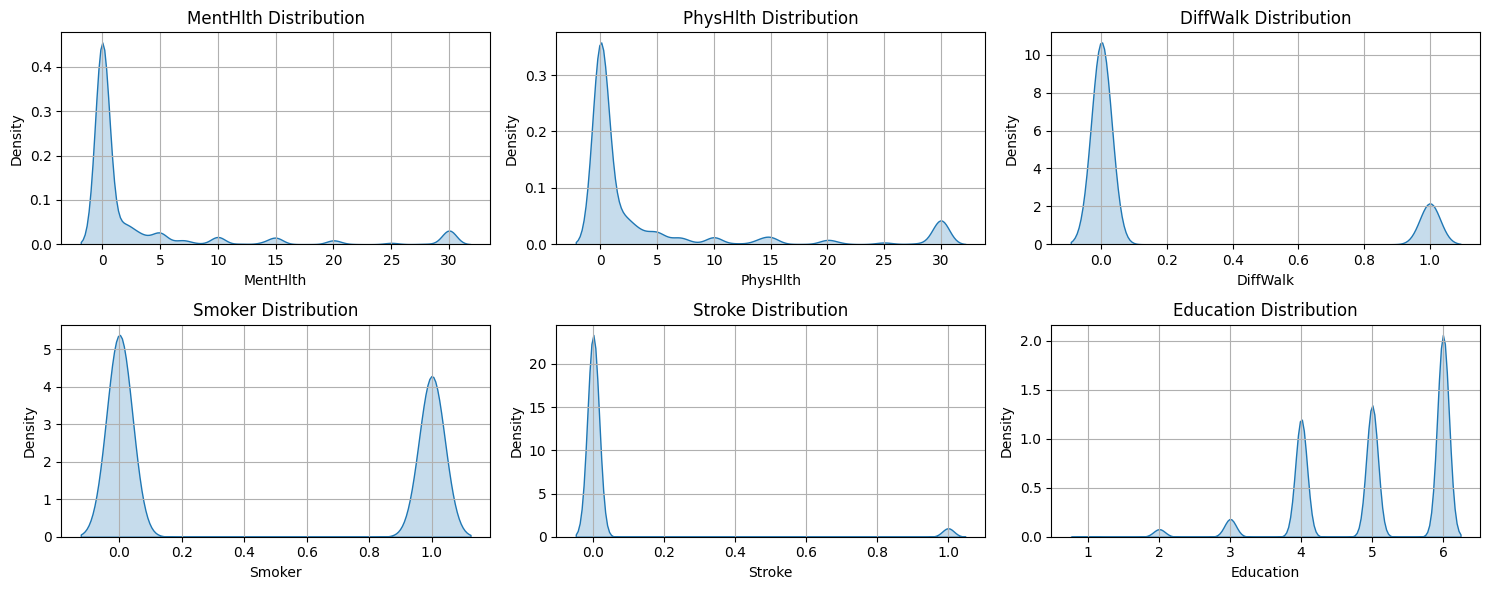


=== Psychology Features Summary for Dataset 2: diabetes_binary_5050split ===

Central Tendencies:
               Mean  Median  Mode  Skewness
MentHlth   3.752037     0.0   0.0  2.388110
PhysHlth   5.810417     0.0   0.0  1.657304
DiffWalk   0.252730     0.0   0.0  1.138002
Smoker     0.475273     0.0   0.0  0.099031
Stroke     0.062171     0.0   0.0  3.626499
Education  4.920953     5.0   6.0 -0.681621

Outlier Detection (IQR Method):
MentHlth: 11816 outliers
PhysHlth: 10624 outliers
DiffWalk: 0 outliers
Smoker: 0 outliers
Stroke: 4395 outliers
Education: 0 outliers

KDE Plots:


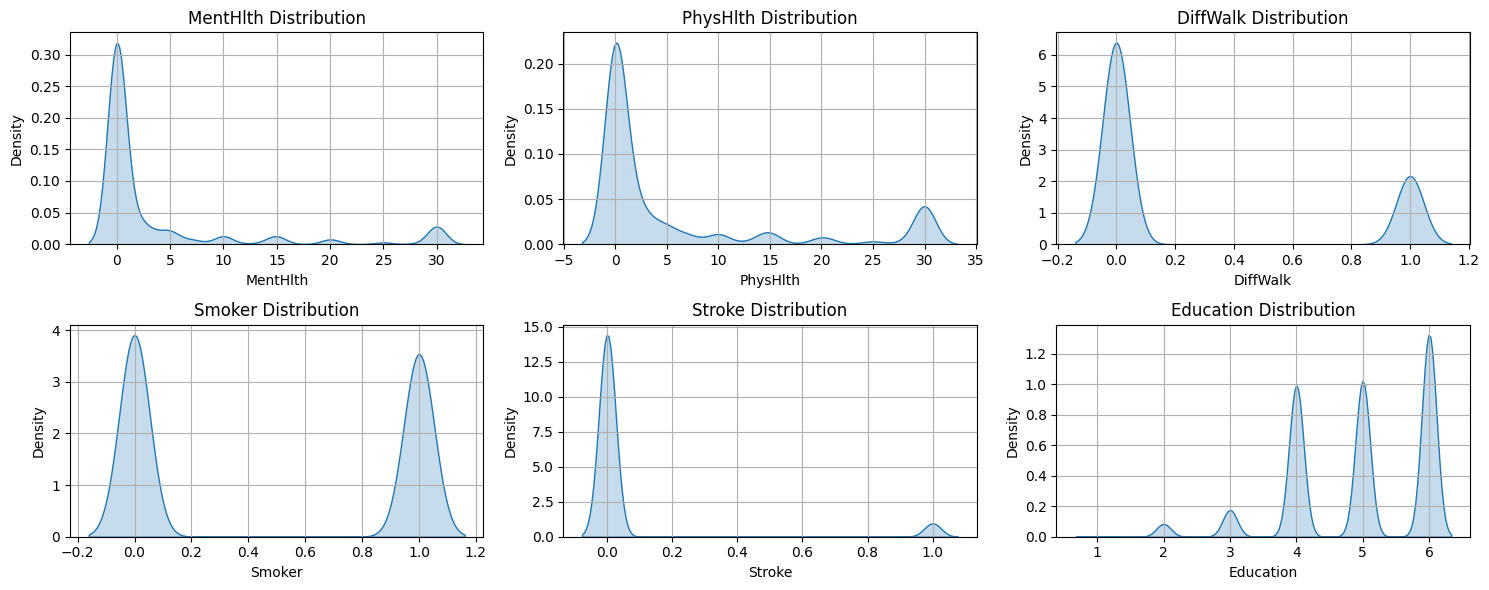


=== Psychology Features Summary for Dataset 3: diabetes_012 ===

Central Tendencies:
               Mean  Median  Mode  Skewness
MentHlth   3.184772     0.0   0.0  2.721148
PhysHlth   4.242081     0.0   0.0  2.207395
DiffWalk   0.168224     0.0   0.0  1.773907
Smoker     0.443169     0.0   0.0  0.228810
Stroke     0.040571     0.0   0.0  4.657340
Education  5.050434     5.0   6.0 -0.777255

Outlier Detection (IQR Method):
MentHlth: 36208 outliers
PhysHlth: 40949 outliers
DiffWalk: 42675 outliers
Smoker: 0 outliers
Stroke: 10292 outliers
Education: 0 outliers

KDE Plots:


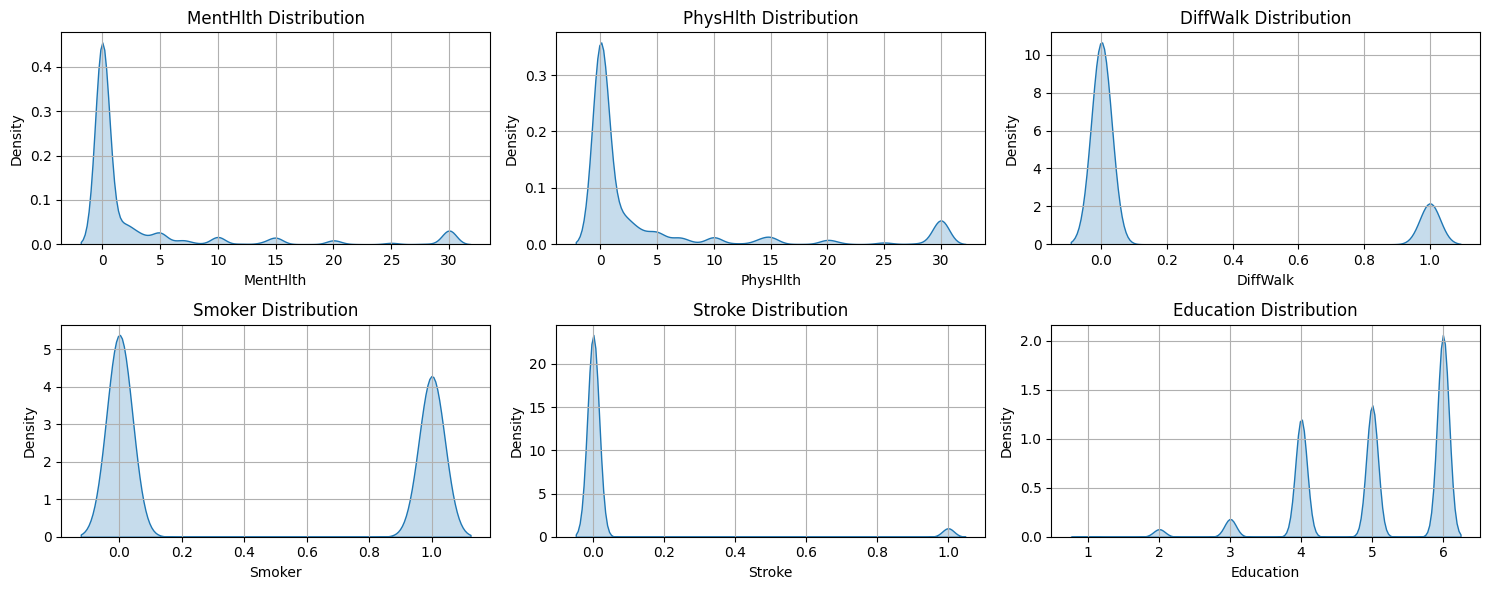

In [67]:
def psych_analysis(df, name):
    print(f"\n=== Psychology Features Summary for {name} ===")
    
    # List of psychology-relevant features to check for
    psych_cols_master = [
        'MentHlth', 'PhysHlth', 'SleepTime', 'DiffWalk',
        'Smoker', 'Stroke', 'AlcoholDrinking', 'Education'
    ]
    
    # Keep only columns that exist in the dataset
    psych_cols = [col for col in psych_cols_master if col in df.columns]
    
    if not psych_cols:
        print("No psychology-relevant columns available in this dataset.\n")
        return

    # Central Tendency
    psych_stats = pd.DataFrame({
        'Mean': df[psych_cols].mean(),
        'Median': df[psych_cols].median(),
        'Mode': df[psych_cols].mode().iloc[0],
        'Skewness': df[psych_cols].skew()
    })
    print("\nCentral Tendencies:")
    print(psych_stats)

    # Outlier Detection
    print("\nOutlier Detection (IQR Method):")
    for col in psych_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"{col}: {len(outliers)} outliers")

    # KDE Plots
    print("\nKDE Plots:")
    num_cols = 3
    rows = -(-len(psych_cols) // num_cols)
    fig, axes = plt.subplots(rows, num_cols, figsize=(num_cols * 5, rows * 3))
    axes = axes.flatten()

    for i, col in enumerate(psych_cols):
        sns.kdeplot(data=df, x=col, ax=axes[i], fill=True)
        axes[i].set_title(f"{col} Distribution")
        axes[i].grid(True)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

psych_analysis(df1, "Dataset 1: diabetes_binary")
psych_analysis(df2, "Dataset 2: diabetes_binary_5050split")
psych_analysis(df3, "Dataset 3: diabetes_012")


### Mental Health Insights from Diabetes Datasets

#### Dataset 1: `diabetes_binary`
- Most people report **no mental or physical distress**, but a small group experiences **frequent issues** (highly skewed right).
- **Outliers:** Over 36,000 for mental health and 40,000+ for physical health.
- **Mobility issues** (DiffWalk) and **stroke history** are rare but skewed—potential red flags for declining well-being.
- Education is mostly high; skewed toward college graduates.

#### Dataset 2: `diabetes_binary_5050split`
- **Worse mental and physical health** than Dataset 1, especially among diagnosed individuals.
- Higher stroke rate and more outliers for mental distress.
- Smoking patterns and education similar to Dataset 1.

#### Dataset 3: `diabetes_012`
- Same mental health pattern as Dataset 1, with the **added nuance of prediabetes**.
- Outliers again suggest a **vulnerable subgroup** with high mental and physical strain.
- Mobility issues are widespread and often overlap with poor mental health.

#### Key Themes
- All datasets show **right-skewed mental health** and **mobility challenges** in a subset of the population.
- Thousands show signs of **chronic stress or disability**.
- Findings support a strong need to **integrate mental health screening into diabetes care**.


**Diabetes Conclusion**

I explored three diabetes-related datasets: one imbalanced multi-class, one imbalanced binary, and one balanced binary. Overall, the data is clean, complete, and well-organized. The imbalanced datasets reflect what you’d expect from large public health surveys. Most people are relatively healthy, which explains why variables like mental and physical health days are heavily right-skewed. In contrast, features like BMI follow a more typical bell-shaped distribution.

One of the most important takeaways came from comparing the imbalanced datasets to the balanced one. The balanced dataset, which includes an equal number of diabetic and non-diabetic cases, shows clear shifts in several key variables. The average BMI is higher, more individuals have high blood pressure, and the population skews older. This highlights a key tradeoff. While a balanced dataset is great for training machine learning models, it no longer mirrors the real-world population.

Outliers were noticeable in features like MentHlth and PhysHlth. These don’t appear to be data entry errors but instead seem to reflect real clinical variation. Because of that, I chose to keep them in the analysis.

The histograms and KDE plots were useful for understanding the shapes of the distributions. Many features are binary or ordinal, which resulted in stepped or bimodal patterns. That’s expected given the survey-based nature of the data.

When grouping the data by diabetes status, clear trends emerged. People with diabetes tended to have worse general health, higher BMI, and were older. Income levels also tended to be lower in diabetic groups. These patterns were consistent across all three datasets and support the idea that the data is internally valid and reliable.

The minimum and maximum values across variables all fall within reasonable clinical ranges. The bin widths and KDE visualizations worked well to show the overall structure of the data.

Since my capstone is focused on psychological and behavioral health, I looked more closely at features like MentHlth, PhysHlth, DiffWalk, and Smoker. The grouped visualizations showed strong associations. People with diabetes reported more poor mental and physical health days, were more likely to have difficulty walking, and were more likely to smoke. Even though there are only a few mental health variables in the dataset, the ones that are available offer a strong starting point for building predictive models related to chronic disease.



# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

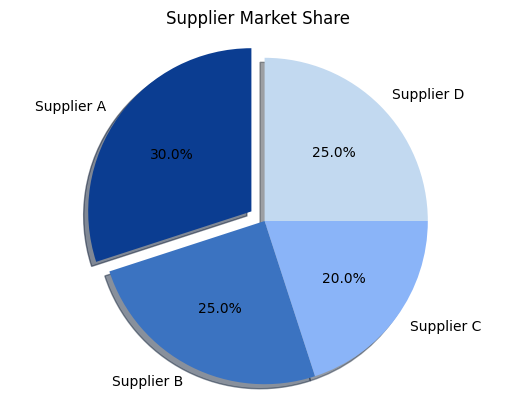

In [68]:
import matplotlib.pyplot as plt

# Labels and data
labels = ['Supplier A', 'Supplier B', 'Supplier C', 'Supplier D']
sizes = [30, 25, 20, 25]  # Adjust these as needed
colors = ['#0b3d91', '#3b73c1', '#8ab4f8', '#c2d9f0']  # Dark to light blue
explode = (0.1, 0, 0, 0)  # "Explode" Supplier A

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)

# Equal aspect ratio ensures the pie is a circle
ax.axis('equal')

# Add title
plt.title('Supplier Market Share')

# Show the chart
plt.show()
